In [1]:
import pandas as pd
import numpy as np

In [379]:
pd.set_option('display.max_columns', None)

In [3]:
service_fault_codes = pd.read_excel('Service Fault Codes_1_0_0_167.xlsx')
faults = pd.read_csv('J1939Faults.csv', low_memory=False)
diagnostics = pd.read_csv('VehicleDiagnosticOnboardData.csv', low_memory=False)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
# Define the service locations
service_locations = [(36.0666667, -86.4347222), (35.5883333, -86.4438888), (36.1950, -83.174722)]

# Filter out faults occurring within 2 miles of service locations
for loc in service_locations:
    lat_mile = 2/69 # Convert 2 miles to degrees of latitude
    lon_mile = 1/(69*np.cos(np.radians(loc[0]))) * 2 # Convert 2 miles to degrees of longitude at the given latitude
    faults = faults[(np.abs(faults['Latitude'] - loc[0]) > lat_mile) | (np.abs(faults['Longitude'] - loc[1]) > lon_mile)]
faults = faults[faults['EquipmentID'].str.len() <= 5]
faults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [5]:
wide_diag = diagnostics.pivot(index='FaultId', columns='Name', values='Value')

In [6]:
fault_diag = pd.merge(left = faults,
         right = wide_diag,
         left_on = 'RecordID',
         right_on = 'FaultId'
        )
fault_diag

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051207,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1051208,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1051210,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,863.25,586.75,23.6,4042.49282573,0,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [7]:
derates=fault_diag.loc[fault_diag['spn'].isin([5246, 1569])]
full_derate = derates.loc[derates['spn'].isin([5246])]
full_derate

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
1786,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4645.45,NaN,33470.466902374,NaN,NaN,False,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
2574,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5209,5810,1071907,2015-02-25 14:47:00.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,False,1,NaN,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
5922,6535,1097942,2015-02-26 22:24:29.000,NaN,NaN,04993120*00021657*082113134117*07700053*I0*BBZ*,79466573,6X1u10D1500000000,CMMNS,0,5246,0,True,1,NaN,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,NaN,14.5,False,64.6226,441699.6,185,10,20.3,198.1625,648.125,9087.95,57.2,69605.769379298,0.6340149,NaN,True,140,22527,NaN,NaN,0,3276.75,NaN,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044449,1239564,119961467,2020-02-06 08:03:09.000,NaN,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
1046465,1241841,120905759,2020-02-13 13:32:39.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,0,13.9925,False,57.78752,477486.8,197.6,10,21.46,204.9688,599.5,9344.3,72.4,63966.356499228,0.4623025,NaN,True,120.2,22527,True,NaN,0,NaN,100,0.58
1046479,1241858,120910417,2020-02-13 14:01:40.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1872,105301976,35.708101,-81.395648,2020-02-13 13:59:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1046712,1242137,121038018,2020-02-14 11:21:54.000,NaN,NaN,NaN,NaN,NaN,NaN,49,5246,19,True,88,NaN,302,105418777,38.349490,-85.708425,2020-02-14 11:22:30.000,0,14.79,False,0,334736.2,17.6,51,84.68,18.10625,651.5,11554.2,100,393.220099402,2.892693,19.4,True,26.6,255,True,NaN,0,NaN,0,0.58


In [8]:
# Extract unique EquipmentID numbers from full_derate
unique_equip_ids = full_derate['EquipmentID'].unique()

# Filter rows in fault_diag based on unique_equip_ids
fault_diag_filtered = fault_diag[fault_diag['EquipmentID'].isin(unique_equip_ids)]
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
# Extract unique EquipmentID numbers from full_derate
unique_equip_ids = full_derate['EquipmentID'].unique()

# Filter rows in fault_diag based on unique_equip_ids
active_false = fault_diag[fault_diag['EquipmentID'].isin(unique_equip_ids)]
active_false

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
fault_diag_filtered = fault_diag_filtered[fault_diag_filtered['active'] == True]
fault_diag_filtered = fault_diag_filtered.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])
fault_diag_filtered = fault_diag_filtered.drop(columns=['ParkingBrake','LocationTimeStamp','active','CruiseControlActive', 'CruiseControlSetSpeed', 'MCTNumber', 'ecuSoftwareVersion', 'ecuSerialNumber','actionDescription', 'faultValue', 'ServiceDistance', 'SwitchedBatteryVoltage'])
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08.000,NaN,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08.000,NaN,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08.000,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08.000,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07.000,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20.000,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31.000,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44.000,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [257]:
fault_diag_filtered[fault_diag_filtered['spn'] == 1761]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
167622,187894,4361569,2015-08-31 13:06:43,Low (Severity Low) Catalyst Tank Level,6X1u10D1500000000,CMMNS,0,1761,17,1,1375,38.016203,-79.155416,NaN,13.92,547617.8,192.2,100,31.9,220.4375,1414.375,11155.95,29.2,83506.370669512,18.55814,NaN,True,125.6,17407,66.33138,NaN,27.55
213133,239796,5160177,2015-10-13 11:15:51,Low (Severity Low) Catalyst Tank Level,6X1u10D1500000000,CMMNS,0,1761,17,1,1375,38.170833,-83.583055,NaN,14.1375,561700.4,194,100,34.22,210.4812,1291.625,11500.9,44,85912.185547076,17.23728,NaN,True,105.8,17407,60.8167,NaN,27.55
330043,371942,7268625,2016-02-04 16:32:51,High Voltage (Catalyst Tank Level),6X1u10D1500000000,CMMNS,0,1761,3,1,1378,38.080092,-84.496898,NaN,14.2825,550752.1,89.6,12,0,75.65,0,11430.15,60.8,83527.504433672,0,NaN,True,64.4,22527,0,NaN,0
132341,149192,3838759,2015-08-03 20:30:40,Low (Severity Low) Catalyst Tank Level,6X1u10D1500000000,CMMNS,0,1761,17,1,1383,35.208842,-88.615231,NaN,14.355,487125.5,183.2,21,34.8,218.975,1385,9774.85,16.8,73236.41797596,3.69842,NaN,True,113,17407,65.12746,NaN,3.48
239963,269136,5633581,2015-11-06 14:31:19,Low (Severity Low) Catalyst Tank Level,6X1u10D1500000000,CMMNS,0,1761,17,1,1383,38.318796,-78.931203,NaN,14.065,511683.2,177.8,100,34.22,215.0375,1325.75,10442,47.2,77133.484087064,19.32425,NaN,True,104,1023,62.70024,NaN,25.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277001,310134,6298807,2015-12-13 13:19:40,Abnormal Update Rate Catalyst Tank Level,unknown,unknown,49,1761,9,70,305,35.972500,-86.446944,34,14.355,191325.1,183.2,42,145,212.675,1382.25,4182.7,30.4,29482.657691408,7.898769,120.2,True,125.6,255,62.10799,34,15.08
277071,310207,6299989,2015-12-13 15:09:36,Abnormal Update Rate Catalyst Tank Level,unknown,unknown,49,1761,9,75,305,35.862314,-86.451944,99.6,14.355,191348.6,186.8,99,145,215.2063,1430,4183.75,92.8,29488.073218474,19.91863,105.8,True,125.6,255,63.77793,99.6,34.22
314308,352902,6965684,2016-01-20 11:40:07,Abnormal Update Rate Catalyst Tank Level,unknown,unknown,49,1761,9,97,305,35.029583,-85.311851,98.8,14.4275,199428.5,186.8,99,99.18,208.4,1248.5,4376.25,60,30881.184534696,17.65996,69.8,True,96.8,255,61.20021,98.8,33.06
910805,1060713,62965432,2018-09-26 12:37:10,Special Instructions Catalyst Tank Level,MX,PCAR,0,1761,14,1,305,38.192083,-85.707361,0,14.5,279009.9,71.6,0,1.16,71.76875,0,10761.2,73.6,44599.771281082,0,71.6,True,73.4,22527,0,0,0


In [10]:
from datetime import datetime
fault_diag_filtered['EventTimeStamp'] = pd.to_datetime(fault_diag_filtered['EventTimeStamp'])
fault_diag_filtered = fault_diag_filtered.replace(',', '.', regex=True)

In [11]:
# Create a groupby object using the 'EquipmentID' column
groups = fault_diag_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated = pd.concat([interpolate_group(group) for _, group in groups])
interpolated

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,NaN,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08,NaN,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [12]:
# Create a groupby object using the 'EquipmentID' column
groups = interpolated.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill = pd.concat([interpolate_group(group) for _, group in groups])
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [13]:
interpolated_bfill = interpolated_bfill.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_40221/2462148358.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,17407,0,0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [14]:
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "LampStatus", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill[int_cols] = interpolated_bfill[int_cols].astype("float")

In [304]:
drop_ids = interpolated_bfill[interpolated_bfill['EquipmentID'].isin(['302', '1878', '1585', '1961', '2007'])]


In [307]:
drop_ids[drop_ids['spn']==5246]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
649696,741123,15172588,2017-03-19 05:22:04,Condition Exists Engine Protection Torque Derate,6X1u10D1500000000,CMMNS,0,5246,0,1,1585,36.325879,-82.836990,0.0,14.1375,532471.1,86.0,31.0,42.92,81.89375,649.500,3132.10,50.8,18271.327891,1.571829,32.0,True,68.0,22527.0,0.000000,0.0,0.58
904795,1052460,60431668,2018-09-02 17:29:25,Abnormal Update Rate Catalyst Tank Reagent Qua...,CECU3B-NAMUX4,PACCR,0,5246,0,1,1878,41.275601,-81.626018,0.0,14.1375,257876.5,183.2,14.0,22.62,192.25630,600.250,5260.15,74.8,35906.661566,0.660432,32.0,True,149.0,22527.0,0.000000,100.0,0.29
904801,1052468,60435489,2018-09-02 19:38:54,Abnormal Update Rate Catalyst Tank Reagent Qua...,CECU3B-NAMUX4,PACCR,0,5246,0,2,1878,41.275694,-81.626111,0.0,14.1375,257876.5,181.4,21.0,22.62,191.69380,599.625,5262.30,71.2,35908.642856,0.766101,32.0,True,147.2,22527.0,0.000000,100.0,0.58
904992,1052704,60536022,2018-09-04 09:09:41,Abnormal Update Rate Catalyst Tank Reagent Qua...,CECU3B-NAMUX4,PACCR,0,5246,0,3,1878,41.212685,-81.639166,0.0,14.1375,257894.2,183.2,0.0,13.92,199.96250,220.000,5277.25,67.2,35922.643975,0.000000,32.0,True,143.6,22527.0,0.000000,100.0,0.58
956351,1121316,77408078,2019-02-14 13:46:15,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,5246,0,1,1961,36.757500,-86.171157,0.0,14.1375,334501.0,183.2,0.0,0.58,201.65000,55.875,8057.30,84.4,46924.749511,0.000000,32.0,True,122.0,22527.0,0.000000,100.0,0.29
863238,995187,45008137,2018-04-07 05:15:00,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,5246,0,1,2007,36.191527,-86.412268,0.0,14.2825,156767.2,194.0,49.0,0.00,187.92500,417.625,3059.80,62.0,21611.915574,0.858562,134.6,True,122.0,22527.0,0.000000,100.0,0.00
1037259,1230409,115873430,2020-01-06 10:13:57,Low Current Aftertreatment Fuel Injector 1,MX16U15D13,PCAR,49,5246,19,4,302,38.247037,-85.788055,0.0,14.6450,332899.0,143.6,10.0,41.18,149.50630,676.250,11446.60,66.0,101.177896,0.700058,73.4,True,89.6,255.0,0.000000,0.0,0.87
1038812,1232200,116794344,2020-01-13 13:18:31,Low Current Malfunction Indicator Lamp,MX16U15D13,PCAR,49,5246,19,46,302,38.192824,-85.859490,8.0,14.6450,333667.1,147.2,9.0,61.48,149.00000,941.000,11492.35,49.6,229.433427,1.307656,80.6,True,87.8,255.0,7.296257,8.0,2.61
1046712,1242137,121038018,2020-02-14 11:21:54,Error in System Engine Exhaust Gas Recirculati...,MX16U15D13,PCAR,49,5246,19,88,302,38.349490,-85.708425,0.0,14.7900,334736.2,17.6,51.0,84.68,18.10625,651.500,11554.20,100.0,393.220099,2.892693,19.4,True,26.6,255.0,0.000000,0.0,0.58


In [15]:
equipment_ids_to_drop = ['302', '1878', '1585', '1961', '2007']
interpolated_drop = interpolated_bfill[~interpolated_bfill['EquipmentID'].isin(equipment_ids_to_drop)]
interpolated_drop

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,0.0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0.0,14.3550,320867.1,181.4,0.0,37.70,210.9875,1173.375,10429.75,83.6,44890.888882,0.000000,32.0,True,80.6,17407.0,42.000810,0.0,2.90


In [16]:
# Code for overall averages
def mileage_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_mileage = eq_df.loc[eq_df['spn'] == 5246, 'DistanceLtd'].iloc[0]
        result.append((eq_id, spn_mileage))
    return result

mileage_to_spn_df = pd.DataFrame(mileage_to_spn(interpolated_drop), columns=['EquipmentID', 'mileage_to_derate'])
# calculate the mean excluding rows where value is zero
overall_avg_mileage = mileage_to_spn_df.loc[mileage_to_spn_df['mileage_to_derate'] != 0, 'mileage_to_derate'].mean()
mileage_to_spn_df['overall_avg_mileage'] = overall_avg_mileage

def time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_timestamp = eq_df['EventTimeStamp'].iloc[0]
        spn_timestamp = eq_df.loc[eq_df['spn'] == 5246, 'EventTimeStamp'].iloc[0]
        result.append((eq_id, spn_timestamp - earliest_timestamp))
    return result

time_to_spn_df = pd.DataFrame(time_to_spn(interpolated_drop), columns=['EquipmentID', 'time_to_derate'])
overall_avg_time = time_to_spn_df.loc[time_to_spn_df['time_to_derate'] != pd.Timedelta(0), 'time_to_derate'].mean()
time_to_spn_df['overall_avg_time'] = overall_avg_time

def eng_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_eng_time = eq_df.loc[eq_df['spn'] == 5246, 'EngineTimeLtd'].iloc[0]
        result.append((eq_id, spn_eng_time))
    return result

eng_time_to_spn_df = pd.DataFrame(eng_time_to_spn(interpolated_drop), columns=['EquipmentID', 'eng_time_to_derate'])
overall_avg_eng_time = eng_time_to_spn_df.loc[eng_time_to_spn_df['eng_time_to_derate'] != 0, 'eng_time_to_derate'].mean()
eng_time_to_spn_df['overall_avg_eng_time'] = overall_avg_eng_time

def fuel_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_fuel_time = eq_df.loc[eq_df['spn'] == 5246, 'FuelLtd'].iloc[0]
        result.append((eq_id, spn_fuel_time))
    return result

fuel_time_to_spn_df = pd.DataFrame(fuel_time_to_spn(interpolated_drop), columns=['EquipmentID', 'fuel_time_to_derate'])
overall_avg_fuel_time = fuel_time_to_spn_df.loc[fuel_time_to_spn_df['fuel_time_to_derate'] != 0, 'fuel_time_to_derate'].mean()
fuel_time_to_spn_df['overall_avg_fuel_time'] = overall_avg_fuel_time

def engine_oil(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        engine_oil_temp = eq_df.loc[eq_df['spn'] == 5246, 'EngineOilTemperature'].iloc[0]
        result.append((eq_id, engine_oil_temp))
    return result

engine_oil_to_spn_df = pd.DataFrame(engine_oil(interpolated_drop), columns=['EquipmentID', 'oil_temp_at_derate'])
overall_avg_oil_temp = engine_oil_to_spn_df.loc[engine_oil_to_spn_df['oil_temp_at_derate'] != 0, 'oil_temp_at_derate'].mean()
engine_oil_to_spn_df['overall_avg_oil_temp'] = overall_avg_oil_temp

def fuel_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        spn_fuel = eq_df.loc[eq_df['spn'] == 5246, 'FuelTemperature'].iloc[0]
        result.append((eq_id, spn_fuel))
    return result

fuel_to_spn_df = pd.DataFrame(fuel_to_spn(interpolated_drop), columns=['EquipmentID', 'fuelTemp_to_derate'])
# calculate the mean excluding rows where value is zero
overall_avg_fuelTemp = fuel_to_spn_df.loc[fuel_to_spn_df['fuelTemp_to_derate'] != 0, 'fuelTemp_to_derate'].mean()
fuel_to_spn_df['overall_avg_fuelTemp'] = overall_avg_fuelTemp

mileage = pd.merge(interpolated_drop, mileage_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, eng_time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, fuel_time_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, engine_oil_to_spn_df, on='EquipmentID')
mileage = pd.merge(mileage, fuel_to_spn_df, on='EquipmentID')
mileage

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_derate,overall_avg_mileage,time_to_derate,overall_avg_time,eng_time_to_derate,overall_avg_eng_time,fuel_time_to_derate,overall_avg_fuel_time,oil_temp_at_derate,overall_avg_oil_temp,fuelTemp_to_derate,overall_avg_fuelTemp
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
2,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
3,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
4,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171303,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171304,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171305,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,

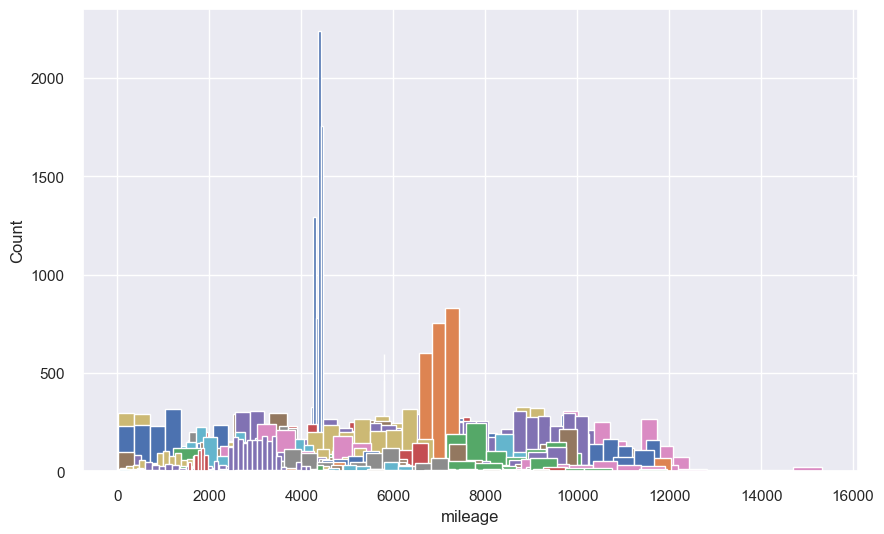

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

engine_time_rul.groupby("EquipmentID")["EngineTimeLtd"].hist(bins=20, figsize=(10, 6))
plt.xlabel("mileage")
plt.ylabel("Count")
plt.show()

In [18]:
# Begin RUL setup
# Select only rows up until first derate by EquipmentID
grouped = interpolated_drop.groupby("EquipmentID")

# Define a function to filter out rows after the first occurrence of spn=5246
def filter_rows(df):
    first_5246_index = df[df["spn"] == 5246].index.min()
    return df.loc[df.index <= first_5246_index]

# Apply the filter_rows function to each group
filtered = grouped.apply(filter_rows)

# Reset the index of the resulting dataframe
filtered = filtered.reset_index(drop=True)
filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
2,614,998928,2015-02-22 07:10:45,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1339,36.514861,-87.208888,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,10299.05,65.2,83573.338285,4.332435,183.2,True,82.4,255.0,66.991580,0.0,3.77
3,19329,1838684,2015-04-11 18:36:41,Condition Exists Cruise Control Enable Switch,unknown,unknown,0,4364,18,1,1339,36.693657,-82.011712,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,17407.0,67.078960,0.0,13.34
4,19611,1841891,2015-04-12 09:20:21,Low Voltage (Power Supply (obsolete)),unknown,unknown,11,627,4,127,1339,37.833564,-79.377314,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,1279.0,67.078960,0.0,13.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58


In [151]:
# compute remaining useful life (RUL) for desired metric
engine_time_rul = (filtered
    .groupby("EquipmentID", group_keys=False)
    .apply(lambda x: x.assign(RUL=x.loc[x["spn"] == 5246, "EngineTimeLtd"].iloc[0] - x["EngineTimeLtd"])))
engine_time_rul

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,RUL
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.00
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.00
2,614,998928,2015-02-22 07:10:45,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1339,36.514861,-87.208888,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,10299.05,65.2,83573.338285,4.332435,183.2,True,82.4,255.0,66.991580,0.0,3.77,714.00
3,19329,1838684,2015-04-11 18:36:41,Condition Exists Cruise Control Enable Switch,unknown,unknown,0,4364,18,1,1339,36.693657,-82.011712,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,17407.0,67.078960,0.0,13.34,457.70
4,19611,1841891,2015-04-12 09:20:21,Low Voltage (Power Supply (obsolete)),unknown,unknown,11,627,4,127,1339,37.833564,-79.377314,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,1279.0,67.078960,0.0,13.34,457.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,26.50
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,4.60
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,4.55
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,3.75


In [54]:
engine_time_rul[engine_time_rul['EquipmentID']=='306']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,RUL
104483,39670,2189989,2015-05-01 01:36:53,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,14,306,37.628703,-85.861851,30.8,14.2825,110818.5,177.8,7.0,41.76,210.4812,1348.250,2201.05,88.8,14834.845752,1.307656,32.0,True,89.6,255.0,65.661460,0.0,2.90,-65
104484,60843,2541396,2015-05-21 03:47:49,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,15,306,37.919351,-85.687500,90.0,14.4275,115739.6,183.2,96.0,41.18,198.7250,1338.125,2297.90,80.8,15469.519107,18.610980,32.0,True,111.2,255.0,64.787660,0.0,29.00,-85
104485,74435,2750424,2015-06-03 02:28:44,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,16,306,37.035972,-86.236342,100.0,14.3550,119600.1,181.4,100.0,41.18,197.8813,1348.375,2374.85,91.6,15975.804845,18.663810,32.0,True,116.6,255.0,65.797390,0.0,28.13,-98
104486,80339,2839271,2015-06-08 12:02:15,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,17,306,36.180277,-86.882638,0.0,14.3550,121250.0,176.0,16.0,24.94,202.5500,601.375,2407.60,100.0,16187.538744,0.634015,32.0,True,147.2,255.0,0.000000,0.0,0.58,-103
104487,119517,3430531,2015-07-13 00:04:58,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,11,639,2,127,306,38.351111,-85.708611,23.6,14.3550,129552.2,181.4,25.0,37.12,194.7875,799.375,2589.45,84.8,17252.548372,1.466159,32.0,True,143.6,1279.0,4.262218,0.0,1.16,-138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-1287
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-1290
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,-1290
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,-1290


In [65]:
import datetime

# create datetime objects for the two timestamps
timestamp1 = datetime.datetime(2018, 9, 7, 11, 22, 40)
timestamp2 = datetime.datetime(2015, 5, 1, 1, 36, 53)

# calculate the difference between the two timestamps
timedelta = timestamp1 - timestamp2

# extract the number of days from the timedelta object
days_diff = timedelta.days

print(days_diff)  # output: 1232


1225


In [41]:
df_306 = engine_time_rul[engine_time_rul['EquipmentID'] == '1329']

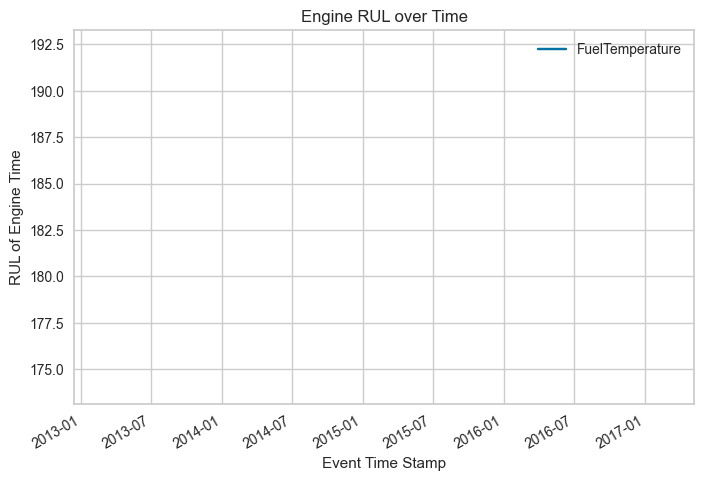

In [42]:
import matplotlib.pyplot as plt

df_306.plot(x="EventTimeStamp", y="FuelTemperature")
plt.xlabel("Event Time Stamp")
plt.ylabel("RUL of Engine Time")
plt.title("Engine RUL over Time")
plt.show()

In [42]:
engine_time_rul[engine_time_rul['EquipmentID']== '306']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,RUL
104483,39670,2189989,2015-05-01 01:36:53,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,14,...,14834.845752,1.307656,32.0,True,89.6,255.0,65.661460,0.0,2.90,7191.85
104484,60843,2541396,2015-05-21 03:47:49,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,15,...,15469.519107,18.610980,32.0,True,111.2,255.0,64.787660,0.0,29.00,7095.00
104485,74435,2750424,2015-06-03 02:28:44,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,16,...,15975.804845,18.663810,32.0,True,116.6,255.0,65.797390,0.0,28.13,7018.05
104486,80339,2839271,2015-06-08 12:02:15,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,17,...,16187.538744,0.634015,32.0,True,147.2,255.0,0.000000,0.0,0.58,6985.30
104487,119517,3430531,2015-07-13 00:04:58,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,11,639,2,127,...,17252.548372,1.466159,32.0,True,143.6,1279.0,4.262218,0.0,1.16,6803.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,26.50
104595,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,...,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,4.60
104596,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,...,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,4.55
104597,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,...,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,3.75


In [22]:
# Percent of time the RUL metric is 0
pt0 = len(engine_time_rul[engine_time_rul['RUL'] == 0])/len(engine_time_rul) * 100
print('Percent of time RUL at 0:', np.round(pt0,2), '%')

Percent of time RUL at 0: 1.46 %


In [68]:
# create binary column based on RUL threshold
engine_time_rul['RUL'] = [1 if out < 144 else 0 for out in engine_time_rul['RUL']]

In [24]:
pt0 = np.mean(engine_time_rul['RUL']) * 100
print('Percent of time RUL at 0:', np.round(pt0,2), '%')

Percent of time RUL at 0: 11.68 %


In [75]:
rul_ml = engine_time_rul.drop(columns=['EventTimeStamp','ecuModel','ecuMake', 'Longitude', 'Latitude','activeTransitionCount','ecuSource','LampStatus','eventDescription','RecordID', 'ESS_Id','spn','fmi'], axis=1)
rul_ml

,EquipmentID,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,RUL
0,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,1
1,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,1
2,1339,100.0,14.5000,546450.1,186.8,26.0,40.02,189.4438,1400.875,10299.05,65.2,83573.338285,4.332435,183.2,True,82.4,66.991580,0.0,3.77,0
3,1339,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,67.078960,0.0,13.34,0
4,1339,100.0,13.7025,558830.2,188.6,52.0,36.54,215.9937,1405.625,10555.35,72.0,85632.559430,9.153590,183.2,True,109.4,67.078960,0.0,13.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104594,306,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,4.417561,0.0,2.32,1
104595,306,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,65.399310,30.4,0.87,1
104596,306,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,64.729400,0.0,21.46,1
104597,306,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,0.000000,0.0,0.58,1


In [92]:
from pycaret.classification import *
from mlxtend.evaluate import GroupTimeSeriesSplit

# create time series split
split = int(len(rul_ml)*0.8)
train_data = rul_ml[:split]
test_data = rul_ml[split:]

# create group-wise time-series split
groups = train_data['EquipmentID']
tscv = GroupTimeSeriesSplit(n_splits=5, test_size=0.2)

# setup pycaret
clf = setup(data=train_data, target='RUL', session_id=123, fold_strategy='timeseries', fold=tscv, group=groups)

# train model on training data
models_to_exclude = ['lightgbm']
model = compare_models(exclude=models_to_exclude)

# predict on test data and evaluate performance
predictions = predict_model(model, data=test_data)
evaluate_model(model)

# plot feature importance
plot_model(model, plot='feature')

TypeError: setup() got an unexpected keyword argument 'group'

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Binary
3,Original data shape,"(83679, 19)"
4,Transformed data shape,"(83679, 19)"
5,Transformed train set shape,"(58575, 19)"
6,Transformed test set shape,"(25104, 19)"
7,Ordinal features,1
8,Numeric features,16
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8718,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3370
lda,Linear Discriminant Analysis,0.8718,0.6363,0.0000,0.0000,0.0000,0.0000,0.0000,0.5300
dummy,Dummy Classifier,0.8718,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8300
lr,Logistic Regression,0.8597,0.4865,0.0361,0.2373,0.0331,0.0196,0.0352,1.1520
et,Extra Trees Classifier,0.8495,0.7350,0.1072,0.2494,0.1087,0.0761,0.0815,1.3860
ada,Ada Boost Classifier,0.8459,0.6925,0.1633,0.2416,0.1689,0.1345,0.1431,1.1000
gbc,Gradient Boosting Classifier,0.8435,0.7045,0.1312,0.2230,0.1311,0.0927,0.1085,3.5880
qda,Quadratic Discriminant Analysis,0.8331,0.6096,0.1537,0.2371,0.1491,0.0901,0.0995,0.3850
rf,Random Forest Classifier,0.8302,0.7134,0.1334,0.1741,0.1123,0.0622,0.0647,1.9540
knn,K Neighbors Classifier,0.8282,0.6017,0.1703,0.2021,0.1473,0.0936,0.0953,0.8510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9289,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

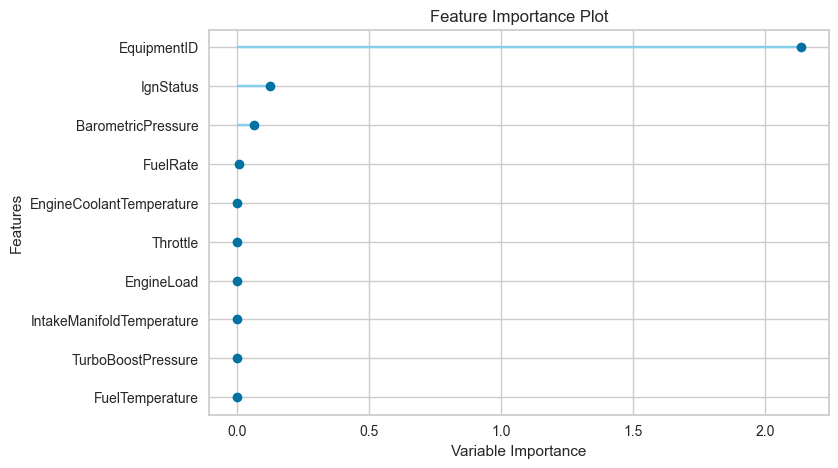

In [96]:
from sklearn.model_selection import GroupKFold
from pycaret.classification import *

# create time series split
split = int(len(rul_ml)*0.8)
train_data = rul_ml[:split]
test_data = rul_ml[split:]

# create group-wise time-series split
groups = train_data['EquipmentID']
gkf = GroupKFold(n_splits=5)

# setup pycaret
clf = setup(data=train_data, target='RUL', session_id=123, fold_strategy='groupkfold', fold_groups=groups)

# train model on training data
models_to_exclude = ['lightgbm']
model = compare_models(exclude=models_to_exclude)

# predict on test data and evaluate performance
predictions = predict_model(model, data=test_data)
evaluate_model(model)

# plot feature importance
plot_model(model, plot='feature')

In [76]:
from sklearn.model_selection import train_test_split

train_units, val_units = train_test_split(rul_ml["EquipmentID"].unique(), test_size=0.2, random_state=1337)

train_df = rul_ml.query("EquipmentID in @train_units")
val_df = rul_ml.query("EquipmentID in @val_units")
assert not (train_df["EquipmentID"].pipe(set) & val_df["EquipmentID"].pipe(set))
print(train_df["EquipmentID"].nunique(), val_df["EquipmentID"].nunique())

148 38


In [77]:
train_df = train_df.drop('EquipmentID', axis=1)
val_df = val_df.drop('EquipmentID', axis=1)

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(79050, 19)"
4,Transformed data shape,"(79050, 19)"
5,Transformed train set shape,"(55335, 19)"
6,Transformed test set shape,"(23715, 19)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0408,0.0149,0.1198,0.7677,0.0830,0.2793,1.0500
xgboost,Extreme Gradient Boosting,0.0489,0.0164,0.1270,0.7435,0.0889,0.2927,2.3640
rf,Random Forest Regressor,0.0424,0.0174,0.1298,0.7284,0.0905,0.2985,3.8280
catboost,CatBoost Regressor,0.0554,0.0192,0.1377,0.7003,0.0952,0.3570,2.3580
knn,K Neighbors Regressor,0.0386,0.0230,0.1505,0.6410,0.1061,0.2953,0.5040
dt,Decision Tree Regressor,0.0334,0.0334,0.1808,0.4791,0.1253,0.2339,0.4300
gbr,Gradient Boosting Regressor,0.0863,0.0376,0.1939,0.4120,0.1335,0.6246,3.0580
lr,Linear Regression,0.1254,0.0602,0.2454,0.0587,0.1713,0.8739,1.0960
ridge,Ridge Regression,0.1254,0.0602,0.2454,0.0587,0.1713,0.8739,0.5580
br,Bayesian Ridge,0.1252,0.0602,0.2454,0.0582,0.1713,0.8749,0.3780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

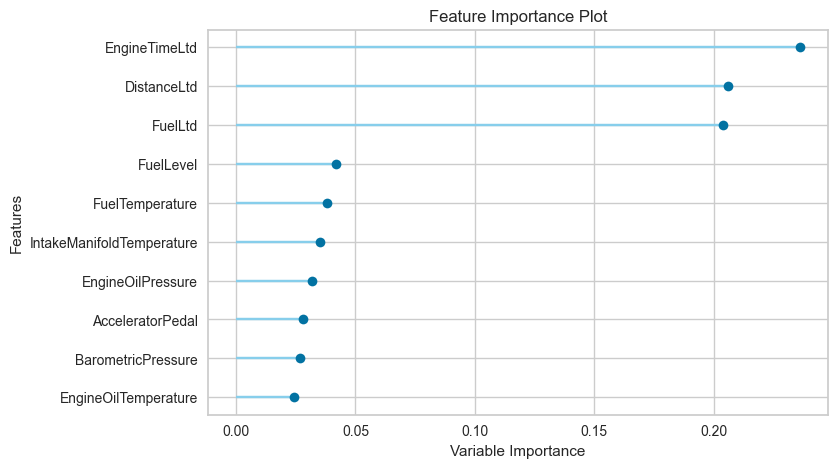

NameError: name 'best_model' is not defined

In [78]:
from pycaret.regression import *
from sklearn.model_selection import TimeSeriesSplit

# define the time-series cross-validation object
#tscv = TimeSeriesSplit(n_splits=5)

# set up the PyCaret experiment with the time-series cross-validation object
exp = setup(data=train_df, target='RUL', session_id=123,
            fold_strategy='timeseries', fold=5)

# train and evaluate models on the pre-defined train and test sets
models_to_exclude = ['lightgbm']

model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(model, plot='feature')
predictions = predict_model(model, data=val_df)
predictions

In [79]:
predictions = predict_model(model, data=val_df)
predictions.head(40)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2835,0.2276,0.4770,-0.1637,0.3296,0.8566


,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,RUL,prediction_label
2,100.000000,14.5000,546450.1250,186.800003,26.0,40.020000,189.443802,1400.875,10299.049805,65.199997,83573.335938,4.332435,183.199997,True,82.400002,66.991577,0.0,3.770000,0,0.33
3,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,85632.562500,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0.10
4,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,85632.562500,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0.10
5,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,85632.562500,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0.10
6,100.000000,14.2100,560118.8125,186.800003,99.0,32.480000,212.281296,1123.125,10581.900391,90.800003,85835.968750,17.858089,183.199997,True,89.599998,53.554428,0.0,25.520000,0,0.08
7,9.600000,14.3550,560811.1250,186.800003,25.0,21.459999,200.074997,710.000,10598.099609,64.000000,85943.625000,1.888836,183.199997,True,104.000000,9.116680,0.0,5.220000,0,0.04
8,11.600000,14.3550,560888.1250,197.600006,17.0,16.820000,214.306198,653.750,10600.200195,58.400002,85953.664062,1.162361,183.199997,True,152.600006,1.291287,0.0,1.160000,0,0.08
9,100.000000,14.1375,561178.6250,197.600006,95.0,35.380001,219.706299,1388.250,10605.500000,39.200001,86000.156250,17.329741,183.199997,True,111.199997,66.399338,0.0,25.809999,0,0.06
10,0.000000,14.3550,563813.1250,192.199997,11.0,16.820000,211.662506,650.000,10658.950195,24.799999,86435.375000,0.620806,183.199997,True,132.800003,0.000000,0.0,0.580000,0,0.09
11,100.000000,13.8475,564289.6250,186.800003,84.0,37.119999,212.843796,1398.500,10668.500000,63.200001,86526.250000,14.938980,183.199997,True,98.599998,66.855659,0.0,21.459999,0,0.05


,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Binary
3,Original data shape,"(79050, 19)"
4,Transformed data shape,"(79050, 19)"
5,Transformed train set shape,"(55335, 19)"
6,Transformed test set shape,"(23715, 19)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9798,0.9779,0.7300,0.9591,0.8235,0.8132,0.8245,1.4860
catboost,CatBoost Classifier,0.9759,0.9718,0.6768,0.9541,0.7821,0.7703,0.7876,3.1020
rf,Random Forest Classifier,0.9717,0.9713,0.5922,0.9862,0.7272,0.7141,0.7455,1.3700
knn,K Neighbors Classifier,0.9695,0.9431,0.6838,0.8310,0.7447,0.7290,0.7357,0.5170
dt,Decision Tree Classifier,0.9654,0.8667,0.7524,0.7457,0.7486,0.7300,0.7303,0.4280
et,Extra Trees Classifier,0.9644,0.9627,0.4890,0.9764,0.6422,0.6264,0.6720,0.8980
gbc,Gradient Boosting Classifier,0.9551,0.9247,0.3527,0.9691,0.5156,0.4975,0.5690,1.9330
ada,Ada Boost Classifier,0.9364,0.8667,0.0900,0.8232,0.1615,0.1500,0.2579,0.5420
lda,Linear Discriminant Analysis,0.9354,0.7177,0.1139,0.6726,0.1938,0.1773,0.2575,0.4520
lr,Logistic Regression,0.9331,0.6450,0.0413,0.6665,0.0776,0.0702,0.1540,0.5200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

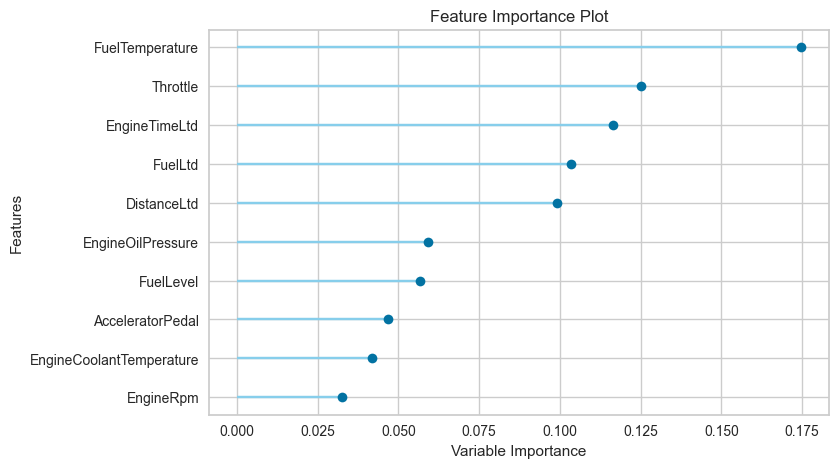

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7434,0.4800,0.1218,0.5916,0.2020,0.1221,0.1771


,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,RUL,prediction_label,prediction_score
2,100.0,14.5000,546450.125000,186.800003,26.0,40.020000,189.443802,1400.875,10299.049805,65.199997,...,4.332435,183.199997,True,82.400002,66.991577,0.0,3.77,0,0,0.9906
3,100.0,13.7025,558830.187500,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.34,0,0,0.9983
4,100.0,13.7025,558830.187500,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.34,0,0,0.9983
5,100.0,13.7025,558830.187500,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.34,0,0,0.9983
6,100.0,14.2100,560118.812500,186.800003,99.0,32.480000,212.281296,1123.125,10581.900391,90.800003,...,17.858089,183.199997,True,89.599998,53.554428,0.0,25.52,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102138,0.0,14.5000,219263.703125,174.199997,10.0,25.520000,203.899994,649.250,4465.799805,84.800003,...,0.660432,131.000000,True,152.600006,0.000000,0.0,0.00,0,0,0.9575
102139,0.0,14.5000,219319.000000,176.000000,12.0,22.040001,202.268799,649.500,4467.549805,81.199997,...,0.686849,136.399994,True,149.000000,0.000000,0.0,0.29,0,0,0.9717
102140,0.0,13.7750,222034.000000,179.600006,7.0,40.599998,197.206299,754.500,4549.950195,100.000000,...,0.647223,140.000000,True,141.800003,5.315636,0.0,0.87,0,0,0.9968
102141,12.0,14.5000,226247.906250,186.800003,14.0,46.980000,206.375000,1083.000,4689.500000,46.799999,...,2.496434,143.600006,True,154.399994,6.111768,12.4,1.16,1,0,0.9947


In [80]:
from pycaret.classification import *

# create time series split
#split = int(len(rul_ml)*0.8)
#train_data = rul_ml[:split]
#test_data = rul_ml[split:]

# setup pycaret
clf = setup(data=train_df, target='RUL', session_id=123, fold_strategy='timeseries')

# train model
#model = create_model('gbc')
#best_model = compare_models()
models_to_exclude = ['lightgbm']

model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(model, plot='feature')
predictions = predict_model(model, data=val_df)
predictions

In [81]:
predictions.head(40)

,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,RUL,prediction_label,prediction_score
2,100.000000,14.5000,546450.1250,186.800003,26.0,40.020000,189.443802,1400.875,10299.049805,65.199997,...,4.332435,183.199997,True,82.400002,66.991577,0.0,3.770000,0,0,0.9906
3,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0,0.9983
4,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0,0.9983
5,100.000000,13.7025,558830.1875,188.600006,52.0,36.540001,215.993698,1405.625,10555.349609,72.000000,...,9.153590,183.199997,True,109.400002,67.078957,0.0,13.340000,0,0,0.9983
6,100.000000,14.2100,560118.8125,186.800003,99.0,32.480000,212.281296,1123.125,10581.900391,90.800003,...,17.858089,183.199997,True,89.599998,53.554428,0.0,25.520000,0,0,0.9982
7,9.600000,14.3550,560811.1250,186.800003,25.0,21.459999,200.074997,710.000,10598.099609,64.000000,...,1.888836,183.199997,True,104.000000,9.116680,0.0,5.220000,0,0,0.9964
8,11.600000,14.3550,560888.1250,197.600006,17.0,16.820000,214.306198,653.750,10600.200195,58.400002,...,1.162361,183.199997,True,152.600006,1.291287,0.0,1.160000,0,0,0.9923
9,100.000000,14.1375,561178.6250,197.600006,95.0,35.380001,219.706299,1388.250,10605.500000,39.200001,...,17.329741,183.199997,True,111.199997,66.399338,0.0,25.809999,0,0,0.9772
10,0.000000,14.3550,563813.1250,192.199997,11.0,16.820000,211.662506,650.000,10658.950195,24.799999,...,0.620806,183.199997,True,132.800003,0.000000,0.0,0.580000,0,0,0.9968
11,100.000000,13.8475,564289.6250,186.800003,84.0,37.119999,212.843796,1398.500,10668.500000,63.200001,...,14.938980,183.199997,True,98.599998,66.855659,0.0,21.459999,0,0,0.9974


In [56]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [106]:
# No derate dataframe
no_derate = fault_diag.loc[~fault_diag['spn'].isin([5246])]

#Extract unique EquipmentID numbers from no_derate
unique_equip_ids = no_derate['EquipmentID'].unique()

#Filter rows in fault_diag based on unique_equip_ids
no_derate_filtered = no_derate[no_derate['EquipmentID'].isin(unique_equip_ids)]
no_derate_filtered = no_derate_filtered[no_derate_filtered['active'] == True]
no_derate_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
6,7,990439,2015-02-21 11:40:52.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1597,105344243,36.902916,-86.436481,2015-02-21 11:41:29.000,82.8,14.2825,False,64.6226,278736.7,188.6,80,39.44,210.0313,1711.375,6292.2,64.8,40961.065436834,14.29175,NaN,True,78.8,1023,NaN,NaN,41.53478,3276.75,NaN,20.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051202,1248448,123899434,2020-03-06 13:12:43.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1936,105355619,30.376851,-81.744953,2020-03-06 13:29:33.000,0,14.645,False,66.48672,391932.6,181.4,11,22.62,197.6,597.375,8016.75,60,51466.131256666,0.6208063,NaN,True,120.2,1279,False,NaN,0.9417657,NaN,100,1.16
1051205,1248452,123901805,2020-03-06 13:42:48.000,Low (Severity Medium) Engine Coolant Level,NaN,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,111,18,True,93,NaN,1886,105351219,39.015694,-77.031157,2020-03-06 13:43:24.000,0,14.355,False,66.48672,457529.7,181.4,11,19.72,207.2188,600.25,13047.05,62,64491.926796682,0.5151371,NaN,True,104,2047,False,NaN,5.932153,NaN,100,0.58
1051208,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96


In [107]:
no_derate_filtered = no_derate_filtered.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])
no_derate_filtered = no_derate_filtered.drop(columns=['ParkingBrake','LocationTimeStamp','active','CruiseControlActive', 'CruiseControlSetSpeed', 'MCTNumber', 'ecuSoftwareVersion', 'ecuSerialNumber','actionDescription', 'faultValue', 'ServiceDistance', 'SwitchedBatteryVoltage'])
no_derate_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35.000,NaN,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100,14.2825,517711.8,183.2,90,33.64,216.6125,1359.125,10323.1,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14.000,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0,14.79,518554.7,185,14,25.52,165.875,648.375,10338.7,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,17407,NaN,NaN,NaN
57589,65939,2611189,2015-05-26 08:44:10.000,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.355,520314.6,161.6,45,38.86,154.5125,1170,10375.15,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39.000,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.355,327738.3,185,16,40.02,198.275,1212.625,9940.35,65.2,44386.056091014,2.166218,NaN,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06.000,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0,14.065,79796.12,185,83,42.34,222.6875,1333.25,1527.45,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17.000,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0,14.1375,79913.24,179.6,53,42.34,222.6875,1352.875,1529.25,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11.000,NaN,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0,14.21,80838.7,134.6,11,38.86,148.7188,595.75,1547.55,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [108]:
from datetime import datetime
no_derate_filtered['EventTimeStamp'] = pd.to_datetime(no_derate_filtered['EventTimeStamp'])
no_derate_filtered = no_derate_filtered.replace(',', '.', regex=True)

In [109]:
# Create a groupby object using the 'EquipmentID' column
groups2 = no_derate_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated2 = pd.concat([interpolate_group(group) for _, group in groups2])
interpolated2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,NaN,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100,14.2825,517711.8,183.2,90,33.64,216.6125,1359.125,10323.1,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0,14.79,518554.7,185,14,25.52,165.875,648.375,10338.7,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.355,520314.6,161.6,45,38.86,154.5125,1170,10375.15,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.355,327738.3,185,16,40.02,198.275,1212.625,9940.35,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0,14.065,79796.12,185,83,42.34,222.6875,1333.25,1527.45,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0,14.1375,79913.24,179.6,53,42.34,222.6875,1352.875,1529.25,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0,14.21,80838.7,134.6,11,38.86,148.7188,595.75,1547.55,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [110]:
# Create a groupby object using the 'EquipmentID' column
groups2 = interpolated2.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill2 = pd.concat([interpolate_group(group) for _, group in groups2])
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100,14.2825,517711.8,183.2,90,33.64,216.6125,1359.125,10323.1,NaN,78862.886425482,16.85423,NaN,True,113,2,64.68085,NaN,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0,14.79,518554.7,185,14,25.52,165.875,648.375,10338.7,NaN,78990.877784676,0.7661014,NaN,True,102.2,255,0,NaN,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,NaN,79274.466482498,0,NaN,True,109.4,17407,27.56364,NaN,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.355,520314.6,161.6,45,38.86,154.5125,1170,10375.15,NaN,79275.39108468,4.530565,NaN,True,100.4,17407,28.79667,NaN,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.355,327738.3,185,16,40.02,198.275,1212.625,9940.35,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0,14.065,79796.12,185,83,42.34,222.6875,1333.25,1527.45,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0,14.1375,79913.24,179.6,53,42.34,222.6875,1352.875,1529.25,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0,14.21,80838.7,134.6,11,38.86,148.7188,595.75,1547.55,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [68]:
interpolated_bfill2.isnull().sum()

RecordID                          0
ESS_Id                            0
EventTimeStamp                    0
eventDescription                  8
ecuModel                         63
ecuMake                          63
ecuSource                         0
spn                               0
fmi                               0
activeTransitionCount             0
EquipmentID                       0
Latitude                          0
Longitude                         0
AcceleratorPedal              24270
BarometricPressure                0
DistanceLtd                       0
EngineCoolantTemperature          0
EngineLoad                        0
EngineOilPressure                 0
EngineOilTemperature              0
EngineRpm                         0
EngineTimeLtd                  3765
FuelLevel                     18837
FuelLtd                           0
FuelRate                          0
FuelTemperature              188241
IgnStatus                         0
IntakeManifoldTemperature   

In [111]:
interpolated_bfill2 = interpolated_bfill2.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill2.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill2[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100,14.2825,517711.8,183.2,90,33.64,216.6125,1359.125,10323.1,94,78862.886425482,16.85423,75.2,True,113,2,64.68085,100,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0,14.79,518554.7,185,14,25.52,165.875,648.375,10338.7,94,78990.877784676,0.7661014,75.2,True,102.2,255,0,100,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,94,79274.466482498,0,75.2,True,109.4,17407,27.56364,100,2.9
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.355,520309.6,185,0,31.9,203.8438,1083.125,10374.8,94,79274.466482498,0,75.2,True,109.4,17407,27.56364,100,2.9
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.355,520314.6,161.6,45,38.86,154.5125,1170,10375.15,94,79275.39108468,4.530565,75.2,True,100.4,17407,28.79667,100,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.355,327738.3,185,16,40.02,198.275,1212.625,9940.35,65.2,44386.056091014,2.166218,32,True,102.2,1279,4.466105,100,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0,14.065,79796.12,185,83,42.34,222.6875,1333.25,1527.45,38,11368.512171794,14.72764,32,True,82.4,1023,65.96243,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0,14.1375,79913.24,179.6,53,42.34,222.6875,1352.875,1529.25,22,11390.042194032,9.166799,32,True,82.4,1023,66.83624,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0,14.21,80838.7,134.6,11,38.86,148.7188,595.75,1547.55,22.4,11527.675833124,0.6604322,32,True,84.2,17407,2.058292,0,0.29


In [112]:
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "LampStatus", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill2[int_cols] = interpolated_bfill2[int_cols].astype("float")

In [113]:
interpolated_bfill2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29


In [78]:
interpolated_bfill['DistanceLtd'].max()

636496.4

In [102]:
import pandas as pd

# Load your data into a pandas DataFrame (assuming your data is stored in a CSV file)
#interpolated_bfill2 = pd.read_csv('your_data_file.csv')

# Create a new DataFrame to hold the results
results_df = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in interpolated_bfill2['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = interpolated_bfill2[interpolated_bfill2['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['DistanceLtd'].max()
    equipment_id_df['MaxDistanceLtd'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df = results_df.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df['MaxDistanceLtd'].mean()
results_df['OverallAvgMaxDistanceLtd'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872


In [104]:
import pandas as pd

# Load your data into a pandas DataFrame (assuming your data is stored in a CSV file)
#interpolated_bfill2 = pd.read_csv('your_data_file.csv')

# Convert the EventTimeStamp column to datetime format
#interpolated_bfill2['EventTimeStamp'] = pd.to_datetime(interpolated_bfill2['EventTimeStamp'])

# Create a new DataFrame to hold the results
results_df2 = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df[results_df['EquipmentID'] == equipment_id]
    
    # Calculate the number of days between the min and max time for the current EquipmentID
    max_time = equipment_id_df['EventTimeStamp'].max()
    min_time = equipment_id_df['EventTimeStamp'].min()
    num_days = (max_time - min_time).days
    equipment_id_df['NumDays'] = num_days
    
    # Append the equipment_id_df to the results_df
    results_df2 = results_df2.append(equipment_id_df)
    
# Calculate the overall average of number of days and store it in a new column
overall_avg_num_days = results_df2['NumDays'].mean()
results_df2['OverallAvgNumDays'] = overall_avg_num_days

# Print the results DataFrame
results_df2

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872,1,1288.309825


In [109]:
# Create a new DataFrame to hold the results
results_df3 = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df2['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df2[results_df2['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['EngineTimeLtd'].max()
    equipment_id_df['MaxEngineLtd'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df3 = results_df3.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df3['MaxEngineLtd'].mean()
results_df3['OverallAvgMaxEngineLtd'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df3

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825,9940.35,10751.188619
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619


In [110]:
# Create a new DataFrame to hold the results
results_df4 = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df3['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df3[results_df3['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['FuelLtd'].max()
    equipment_id_df['MaxFuelLtd'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df4 = results_df4.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df4['MaxFuelLtd'].mean()
results_df4['OverallAvgMaxFuelLtd'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df4

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,2.058292,0.0,0.29,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.8426

In [111]:
# Create a new DataFrame to hold the results
results_df5 = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df4['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df4[results_df4['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['EngineOilTemperature'].max()
    equipment_id_df['MaxOilTemp'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df5 = results_df5.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df5['MaxOilTemp'].mean()
results_df5['OverallAvgMaxOilTemp'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df5

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752
5829,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,R1762,39.952870,-81.936990,0.0,14.2100

In [112]:
# Create a new DataFrame to hold the results
results_df6 = pd.DataFrame()

# Loop through each unique EquipmentID
for equipment_id in results_df5['EquipmentID'].unique():

    # Filter the DataFrame to only include rows with the current EquipmentID
    equipment_id_df = results_df5[results_df5['EquipmentID'] == equipment_id]
    
    # Calculate the max DistanceLtd for the current EquipmentID and store it in a new column
    max_distance_ltd = equipment_id_df['FuelTemperature'].max()
    equipment_id_df['MaxFuelTemp'] = max_distance_ltd
    
    # Append the equipment_id_df to the results_df
    results_df6 = results_df6.append(equipment_id_df)
    
# Calculate the overall average of max DistanceLtd per EquipmentID and store it in a new column
overall_avg_max_distance_ltd = results_df6['FuelTemperature'].mean()
results_df6['OverallAvgMaxFuelTemp'] = overall_avg_max_distance_ltd

# Print the results DataFrame
results_df6

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp
37535,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
40253,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
51156,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
57539,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
57589,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024789,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752,32.0,45.54226
3745,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226
3916,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226

In [ ]:
derates = derates.csv

In [73]:
results_df6['FuelTemperature'].max()

NameError: name 'results_df6' is not defined

In [29]:
val_df.to_csv('test.csv', index=False)

In [240]:
df_306 = engine_time_rul[engine_time_rul['EquipmentID'] == '306']

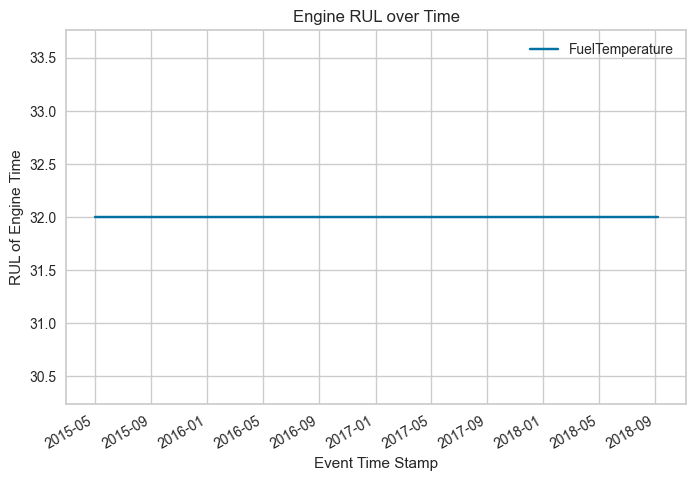

In [126]:
import matplotlib.pyplot as plt

df_306.plot(x="EventTimeStamp", y="FuelTemperature")
plt.xlabel("Event Time Stamp")
plt.ylabel("RUL of Engine Time")
plt.title("Engine RUL over Time")
plt.show()

In [122]:
df_1327 = results_df6[results_df6['EquipmentID'] == '1600']

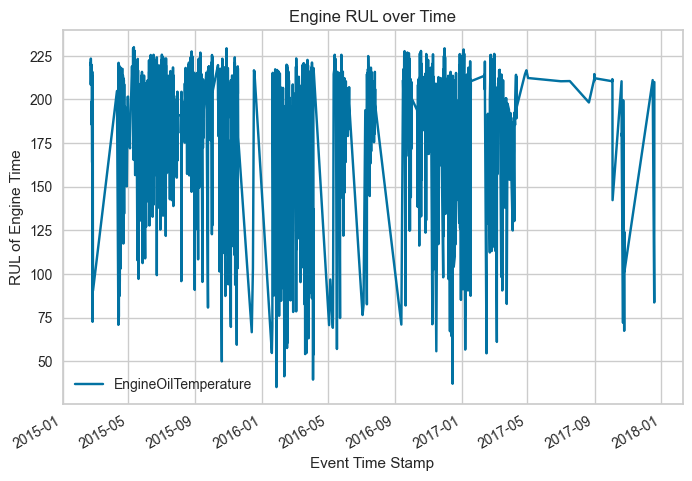

In [123]:
df_1327.plot(x="EventTimeStamp", y="EngineOilTemperature")
plt.xlabel("Event Time Stamp")
plt.ylabel("RUL of Engine Time")
plt.title("Engine RUL over Time")
plt.show()

In [148]:
import datetime as dt

plotly_ma = results_df6[(results_df6['EventTimeStamp'] >= dt.datetime(2015, 1, 1)) & (results_df6['EventTimeStamp'] <= dt.datetime(2015, 12, 31))]
plot = df_306[(df_306['EventTimeStamp'] >= dt.datetime(2015, 1, 1)) & (df_306['EventTimeStamp'] <= dt.datetime(2015, 12, 31))]

In [245]:
# create moving-averages
df_306['MA48'] = df_306.rolling('48 H', on = 'EventTimeStamp')['EngineOilTemperature'].mean()
df_306['MA336'] = df_306['EngineOilTemperature'].rolling(336).mean()
# plot 
import plotly.express as px
fig = px.line(df_306, x="EventTimeStamp", y=['EngineOilTemperature', 'MA48', 'MA336'], title='Oil Temperature', template = 'plotly_dark')
fig.show()

In [140]:
results_df6[results_df6['EquipmentID']== '1840']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,MA48,MA336
281221,315324,6377993,2015-12-17 07:57:26,Incorrect Data Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,2,1,1840,39.709583,-83.422638,100.0,14.0650,5753.698,181.4,48.0,40.60,226.1750,1349.375,106.85,94.8,842.973018,8.268611,32.0,True,82.4,18431.0,66.865360,38.0,7.25,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
289636,324621,6523993,2015-12-27 10:19:19,Incorrect Data Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,2,1,1840,31.617129,-83.568935,100.0,14.5000,7762.284,183.2,42.0,40.60,226.1187,1354.625,145.80,65.2,1155.092297,6.234480,32.0,True,105.8,18431.0,66.855660,100.0,5.80,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
314275,352866,6965082,2016-01-20 11:19:39,Incorrect Data Wheel Sensor ABS Axle 3 Left,unknown,unknown,11,793,2,1,1840,36.183425,-86.336250,100.0,14.4275,17031.630,183.2,62.0,40.60,226.2312,1361.875,312.00,100.0,2558.110066,10.883920,32.0,True,80.6,1279.0,67.040120,34.0,11.31,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
334264,376600,7345821,2016-02-09 11:26:02,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,11,639,2,1,1840,40.172777,-84.969490,0.0,13.9200,23861.210,168.8,19.0,34.80,175.8875,600.625,439.50,60.0,3547.962744,0.818936,32.0,True,107.6,1279.0,0.000000,100.0,0.29,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
686447,783338,16253761,2017-05-12 07:27:51,Low Voltage (Relay Diagonal 1),EC80ESP,BNDWS,11,802,4,2,1840,38.438009,-78.850046,100.0,13.9200,179702.000,188.6,100.0,38.86,226.9625,1292.625,3282.45,44.8,25587.704957,17.118400,32.0,True,95.0,1279.0,63.768220,100.0,24.07,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012601,1198200,102114251,2019-09-16 08:13:02,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,5,1840,35.905694,-84.147314,61.2,14.2100,404815.900,190.4,54.0,38.86,224.3750,1292.250,8854.95,30.0,58648.176834,9.880066,32.0,True,109.4,1023.0,63.991520,100.0,10.73,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
1012842,1198508,102305889,2019-09-17 10:54:30,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,6,1840,35.153194,-86.592314,29.6,14.2825,405223.600,188.6,24.0,38.28,213.0125,1034.375,8865.10,72.0,58707.351374,1.796376,32.0,True,125.6,1023.0,5.427289,100.0,2.03,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
1016587,1203121,104984292,2019-10-06 15:48:06,Out of Calibration Fuel Level,6X1u13D1500000000,CMMNS,0,96,13,1,1840,39.306990,-76.753055,0.0,14.5000,2131635.000,188.6,0.0,38.86,226.2875,1231.750,9002.20,82.0,59543.720091,0.000000,32.0,True,93.2,2047.0,61.632260,100.0,2.03,2131635.0,518653.91872,1503,1288.309825,9876.15,10751.

In [136]:
results_df6.sort_values(by='DistanceLtd', ascending=False)


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,MA48,MA336
1016587,1203121,104984292,2019-10-06 15:48:06,Out of Calibration Fuel Level,6X1u13D1500000000,CMMNS,0,96,13,1,1840,39.306990,-76.753055,0.0,14.5000,2131635.0,188.6,0.0,38.86,226.28750,1231.750,9002.20,82.0,59543.720091,0.000000,32.0,True,93.2,2047.0,61.63226,100.0,2.03,2.131635e+06,518653.91872,1503,1288.309825,9876.15,10751.188619,64118.123343,72253.842633,237.0875,308.719752,32.0,45.54226,32.0,32.0
972862,1143743,82331772,2019-04-03 07:45:27,High Voltage (Water In Fuel Indicator),6X1u13D1500000000,CMMNS,0,97,3,126,1730,35.921851,-88.745787,49.2,14.5725,656813.7,186.8,37.0,41.76,200.35620,1361.875,13948.75,82.0,89844.914885,6.445818,32.0,True,78.8,1023.0,35.15602,100.0,6.96,6.568137e+05,518653.91872,3014,1288.309825,13948.75,10751.188619,89844.914885,72253.842633,233.6000,308.719752,32.0,45.54226,32.0,32.0
972401,1143184,82188581,2019-04-02 05:35:54,High Voltage (Water In Fuel Indicator),6X1u13D1500000000,CMMNS,0,97,3,126,1730,30.531574,-84.571666,100.0,14.6450,656215.6,186.8,100.0,40.02,197.60000,1248.000,13936.65,98.0,89749.284602,17.237280,32.0,True,78.8,1023.0,61.63226,100.0,24.65,6.568137e+05,518653.91872,3014,1288.309825,13948.75,10751.188619,89844.914885,72253.842633,233.6000,308.719752,32.0,45.54226,32.0,32.0
972303,1143083,82150161,2019-04-01 16:27:05,High Voltage (Water In Fuel Indicator),6X1u13D1500000000,CMMNS,0,97,3,126,1730,30.471435,-83.250462,0.0,14.7175,656132.6,185.0,13.0,23.78,190.11870,600.750,13934.15,46.4,89734.623053,0.607598,32.0,True,132.8,1023.0,0.00000,100.0,0.29,6.568137e+05,518653.91872,3014,1288.309825,13948.75,10751.188619,89844.914885,72253.842633,233.6000,308.719752,32.0,45.54226,32.0,32.0
972319,1143099,82153778,2019-04-01 16:37:28,High Voltage (Water In Fuel Indicator),6X1u13D1500000000,CMMNS,0,97,3,126,1730,30.469259,-83.387453,0.0,14.7175,656132.6,185.0,9.0,23.78,189.72500,603.625,13934.35,46.4,89734.755140,0.488720,32.0,True,131.0,1023.0,0.00000,100.0,0.58,6.568137e+05,518653.91872,3014,1288.309825,13948.75,10751.188619,89844.914885,72253.842633,233.6000,308.719752,32.0,45.54226,32.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723140,825775,20319145,2017-07-11 09:08:33,Data May Be Invalid Catalyst Tank Level,CECU3B-NAMUX4,PACCR,49,1761,19,1,1938,36.142129,-86.719444,0.0,14.4275,0.0,95.0,0.0,0.00,97.58750,0.000,0.00,46.8,0.000000,0.000000,32.0,True,93.2,255.0,0.00000,100.0,0.00,4.174767e+05,518653.91872,1262,1288.309825,6905.80,10751.188619,41468.407863,72253.842633,236.8625,308.719752,32.0,45.54226,32.0,32.0
723144,825779,20319210,2017-07-11 09:09:16,Out of Calibration Vehicle Identification Number,6X1u13D1500000000,CMMNS,0,237,13,1,1938,36.142129,-86.719444,0.0,14.4275,0.0,95.0,0.0,0.00,97.58750,0.000,0.00,46.8,0.000000,0.000000,32.0,True,93.2,22527.0,0.00000,100.0,0.00,4.174767e+05,518653.91872,1262,1288.309825,6905.80,10751.188619,41468.407863,72253.842633,236.8625,308.719752,32.0,45.54226,32.0,32.0
227908,255991,5412651,2015-10-26 16:56:30,High Voltage (Heater Circuit #09),unknown,unknown,49,520203,3,2,1519,33.618842,-81.855092,0.0,14.5725,0.0,156.2,8.0,0.00,148.88750,0.000,9533.05,35.2,0.000000,0.000000,75.2,True,120.2,0.0,0.00000,100.0,0.00,5.012165e+05,518653.91872,580,1288.309825,11792.05,10751.188619,78420.662410,72253.842633,

In [82]:
no_derates = pd.read_csv('no_derates.csv')
no_derates

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,...,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp
0,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,...,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
1,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,...,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
2,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
3,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
4,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,...,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544612,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,...,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752,32.0,45.54226
544613,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,...,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226
544614,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,...,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226
544615,6439,1089561,2015-02-26 13:12:11,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,5848,9,1,...,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226


In [90]:
mileage

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_derate,overall_avg_mileage,time_to_derate,overall_avg_time,eng_time_to_derate,overall_avg_eng_time,fuel_time_to_derate,overall_avg_fuel_time,oil_temp_at_derate,overall_avg_oil_temp,fuelTemp_to_derate,overall_avg_fuelTemp
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
2,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
3,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
4,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171303,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171304,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171305,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,

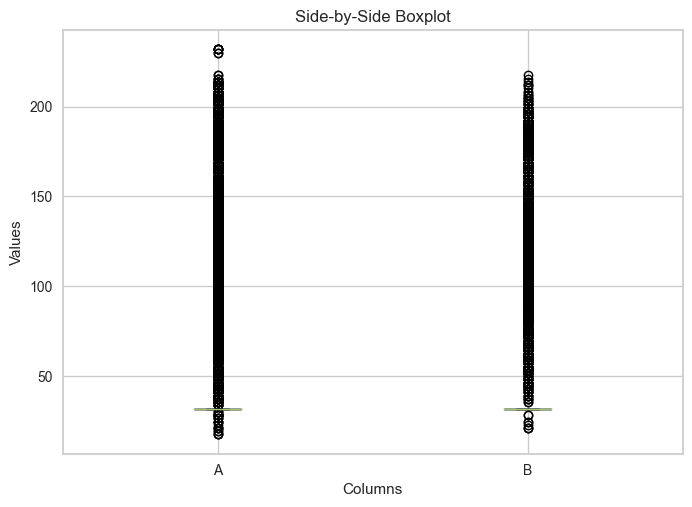

In [93]:

import matplotlib.pyplot as plt

# create two sample dataframes
#df_a = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10]})
#df_b = pd.DataFrame({'A': [11, 12, 13, 14, 15], 'B': [16, 17, 18, 19, 20]})

# create a figure and axis object
fig, ax = plt.subplots()

# plot the boxplots side by side
boxplot_data = [no_derates['FuelTemperature'], filtered['FuelTemperature']]
ax.boxplot(boxplot_data, positions=[1, 2])

#boxplot_data = [df_a['B'], df_b['B']]
#ax.boxplot(boxplot_data, positions=[4, 5])

# set axis labels and title
ax.set_xticklabels(['A', 'B'])
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Side-by-Side Boxplot')

# display the plot
plt.show()


In [102]:
filtered2 = filtered.drop(columns=['eventDescription', 'ecuModel','ecuMake','IgnStatus'])

In [147]:
# create a dictionary with engine slices 

engines=filtered.index.unique().values # engine numbers
engine_slices = dict()# key is engine number, value is a slice that gives numpy index for the data that pertains to an engine  

for i,engine_num in enumerate(engines):
    row_name=filtered.loc[engine_num].iloc[-1].name
    row_sl=filtered.EquipmentID.get_loc(row_name) # row slice to get numpy index 
    engine_slices[engine_num]=row_sl

AttributeError: 'numpy.float64' object has no attribute 'name'

In [ ]:
# create RUL vector
RUL = np.empty(len(engines))

for i,engine_num in enumerate(engines):
    RUL[i]=-1*df.loc[engine_num]['RUL'].min()

In [141]:
# ax = plt.subplot(figsize=(15,12))
fig=plt.figure(figsize=(15,12))
ax=sns.distplot(RUL)
ax.set_title('Distribution of RUL for all engines',{'fontsize':16});
ax.set_xlabel('RUL');

In [145]:
plot_ts(filtered2, 306)

ValueError: No axis named 1 for object type Series

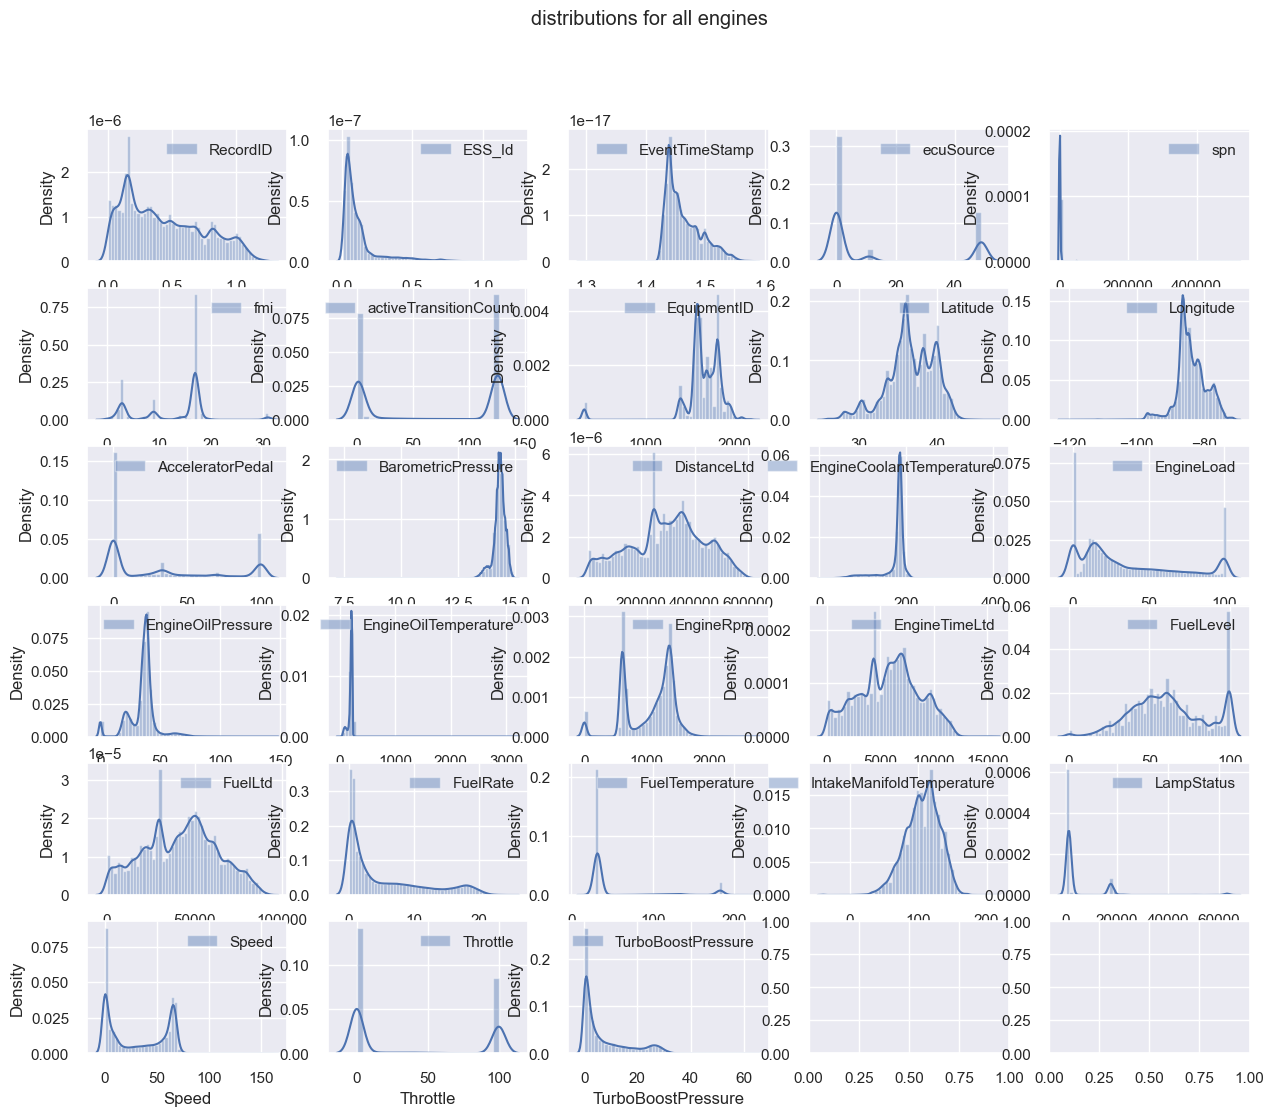

In [104]:
fig=plot_dist(filtered2)


In [121]:
interpolated_bfill3.loc[interpolated_bfill3['DistanceLtd'].idxmax(), 'DistanceLtd'] = 410000

In [138]:
interpolated_bfill2.loc[interpolated_bfill2['EngineTimeLtd'] > 111000, 'EngineTimeLtd'] = 10000

In [139]:
interpolated_bfill3 = interpolated_bfill2.drop(columns=['EquipmentID','eventDescription', 'ecuModel','ecuMake','IgnStatus'])

In [118]:
def plot_dist(interpolated_bfill3, EquipmentID=None):
    '''plot all non trivial measurements and states'''
    
    cols = interpolated_bfill3.columns
    n_cols = min(len(cols), 5)
    n_rows = int(np.ceil(len(cols) / n_cols))
    
    sns.set()
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,12))
    axes = axes.flatten()
    if EquipmentID != None: 
        fig.suptitle('distributions for engine #: {}'.format(EquipmentID))
        df_plot = interpolated_bfill3.loc[EquipmentID]
    else: 
        fig.suptitle('distributions for all engines')
        df_plot = interpolated_bfill3
    for col, ax in zip(cols, axes):
        ax=sns.distplot(df_plot[col], ax=ax, label=col)
        ax.legend(loc=1)
#         labels(col, "p", ax)
    return fig

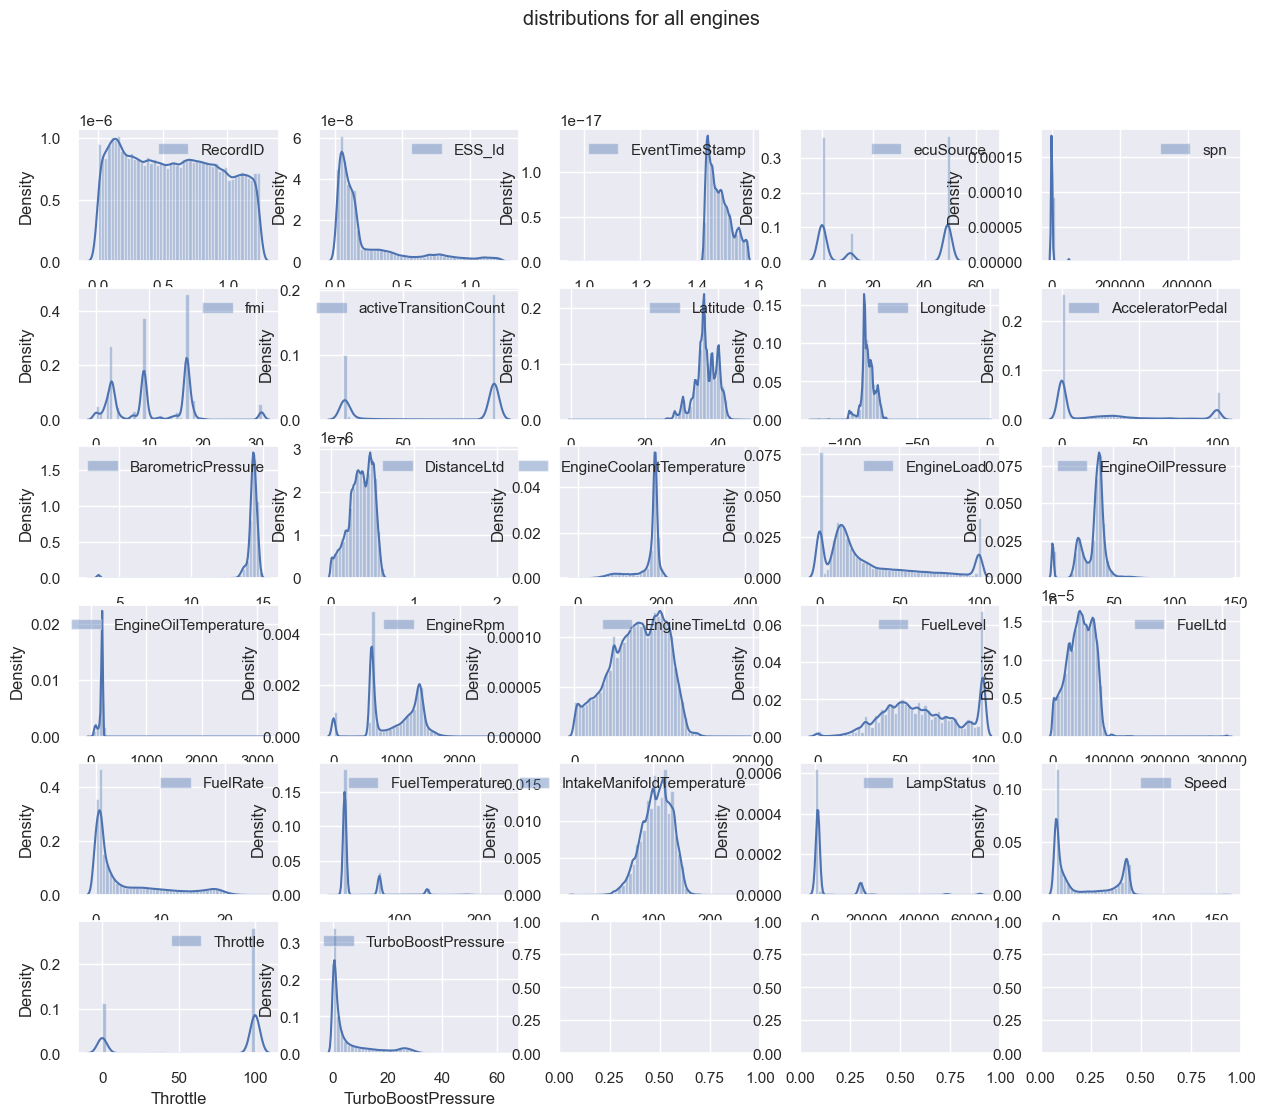

In [140]:
fig=plot_dist(interpolated_bfill3)


In [160]:
no_derates

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp
0,42689,2241022,2015-05-04 15:38:35,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1327,35.988750,-83.579583,100.0,14.2825,517711.80,183.2,90.0,33.64,216.6125,1359.125,10323.10,94.0,78862.886425,16.854230,75.2,True,113.0,2.0,64.680850,100.0,26.39,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
1,45667,2296851,2015-05-07 06:52:14,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,596,31,126,1327,40.197500,-74.661435,0.0,14.7900,518554.70,185.0,14.0,25.52,165.8750,648.375,10338.70,94.0,78990.877785,0.766101,75.2,True,102.2,255.0,0.000000,100.0,1.74,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
2,58809,2507532,2015-05-19 12:02:55,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.491250,-86.458842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
3,65879,2610228,2015-05-26 08:11:45,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.490787,-86.433842,11.6,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,94.0,79274.466482,0.000000,75.2,True,109.4,17407.0,27.563640,100.0,2.90,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
4,65939,2611189,2015-05-26 08:44:10,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u10D1500000000,CMMNS,0,3216,9,1,1327,35.523703,-86.440787,48.8,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,94.0,79275.391085,4.530565,75.2,True,100.4,17407.0,28.796670,100.0,6.67,520314.60,518653.91872,21,1288.309825,10375.15,10751.188619,79275.391085,72253.842633,216.6125,308.719752,75.2,45.54226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544612,1214360,109664481,2019-11-12 00:24:39,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.271666,-86.397361,32.4,14.3550,327738.30,185.0,16.0,40.02,198.2750,1212.625,9940.35,65.2,44386.056091,2.166218,32.0,True,102.2,1279.0,4.466105,100.0,2.61,327738.30,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752,32.0,45.54226
544613,4246,1048627,2015-02-24 13:45:06,Low (Severity Low) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,17,43,R1762,41.254166,-85.088888,0.0,14.0650,79796.12,185.0,83.0,42.34,222.6875,1333.250,1527.45,38.0,11368.512172,14.727640,32.0,True,82.4,1023.0,65.962430,47.2,16.82,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226
544614,4428,1051023,2015-02-24 15:31:17,Low (Severity Medium) Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,18,11,R1762,39.944444,-86.016990,0.0,14.1375,79913.24,179.6,53.0,42.34,222.6875,1352.875,1529.25,22.0,11390.042194,9.166799,32.0,True,82.4,1023.0,66.836240,67.2,8.99,80838.70,518653.91872,1,1288.309825,1547.55,10751.188619,11527.675833,72253.842633,222.6875,308.719752,32.0,45.54226
544615,6439,1089

In [161]:
no_derates.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)

,spn,fmi,eventDescription,count
184,111,17,Low (Severity Low) Engine Coolant Level,152913
739,929,9,Abnormal Update Rate Tire Location,115370
125,96,3,High Voltage (Fuel Level),41479
729,829,3,High Voltage (Left Fuel Level Sensor),40578
185,111,18,Low (Severity Medium) Engine Coolant Level,17909
488,639,2,Incorrect Data J1939 Network #1 Primary Vehicl...,14701
335,596,31,Condition Exists Cruise Control Enable Switch,11384
131,97,15,High (Severity Low) Water In Fuel Indicator,8072
834,1569,31,Condition Exists Engine Protection Torque Derate,5026
129,97,3,High Voltage (Water In Fuel Indicator),4105


In [463]:
# find the first occurrence of spn = 5246 for each EquipmentID
earliest_timestamps = interpolated_drop.loc[interpolated_drop['spn'] == 5246] \
    .groupby('EquipmentID')['EventTimeStamp'].first()

# create a new column with the time difference in hours between each row and the first occurrence of spn = 5246 for each EquipmentID
interpolated_drop['time_diff'] = (interpolated_drop['EventTimeStamp'] - interpolated_drop['EquipmentID'].map(earliest_timestamps)) \
    .dt.total_seconds() / 3600

# filter the dataframe to keep only the rows where the time difference is less than or equal to 8 hours
filtered_df = interpolated_drop.loc[(interpolated_drop['EquipmentID'].isin(earliest_timestamps.index)) 
    & (interpolated_drop['time_diff'] >= -72)
    & (interpolated_drop['time_diff'] <= 0)]
filtered_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
71850,82140,2865286,2015-06-09 15:40:51,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,35.749027,-78.868333,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,2.0,61.962360,0.0,9.86,-71.908611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905111,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-69.512500
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-5.616944
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,-5.565833
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,-4.593056


In [431]:
filtered_df2 = filtered_df.rename(columns={'time_diff': 'Time Until Derate'})
grouped_df = filtered_df2.groupby('EquipmentID')
plot_df = pd.DataFrame(columns=['EquipmentID', 'event_type', 'Time Until Derate'])
for group_name, group_data in grouped_df:
    spn_data = group_data[group_data['spn'] == 1569]
    if len(spn_data) > 0:
        time_diff = spn_data.iloc[0]['Time Until Derate']
        plot_df = plot_df.append({'EquipmentID': group_name,
                                  #'event_type': 'SPN 1569',
                                  'Time Until Derate': time_diff}, ignore_index=True)
import plotly.express as px

fig = px.scatter(plot_df, x='Time Until Derate', y='EquipmentID', color='EquipmentID',
                 symbol='EquipmentID', hover_data=['EquipmentID', 'Time Until Derate'],
                 title='Partial Derate Occurrences Within 72 Hours of Full Derate',
                 category_orders={'EquipmentID': plot_df['EquipmentID'].unique()})
fig.update_layout(xaxis_title='Time Leading Up To Derate', yaxis_title='', template = 'seaborn')
fig.update_yaxes(tickfont=dict(size=1), showgrid=False, showticklabels=False)
fig.show()


In [426]:
fig.write_html('scatter.html')

In [464]:
num_equipment_with_spn = filtered_df.loc[filtered_df['spn'] == 1569, 'EquipmentID'].nunique()

num_unique_equipment = filtered_df['EquipmentID'].nunique()

percentage = (num_equipment_with_spn / num_unique_equipment) * 100

print(f"{percentage:.2f}% of trucks with a derate had at least one partial derate 72 hours prior")

81.18% of trucks with a derate had at least one partial derate 72 hours prior


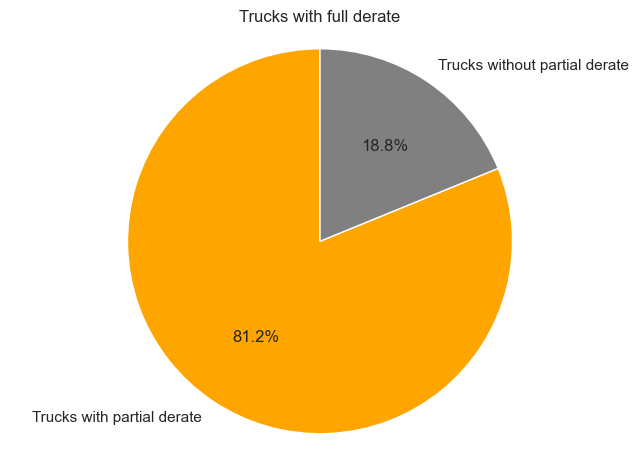

In [465]:
import matplotlib.pyplot as plt

labels = ['Trucks with partial derate', 'Trucks without partial derate']
sizes = [percentage, 100-percentage]
colors = ['orange', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Trucks with full derate')
plt.show()


In [466]:
import plotly.graph_objs as go

labels = ['Trucks with partial derate', 'Trucks without partial derate']
values = [percentage, 100-percentage]
colors = ['orange', 'gray']

fig = go.Figure(go.Bar(
            x=values,
            y=labels,
            orientation='h',
            marker=dict(
                color=colors,
            )
        ))

fig.update_layout(
    title='Trucks with full derate',
    xaxis_title='Percentage',
    yaxis_title='',
    barmode='stack',
    template='plotly_dark'
)

fig.show()


In [472]:
import plotly.graph_objs as go

labels = ['No partial derate', 'Partial derate']
values = [100-percentage, percentage]
colors = ['gray', 'orange']

fig = go.Figure(go.Bar(
            x=values,
            y=labels,
            orientation='h',
            marker=dict(
                color=colors,
            ),
            text=[f'{val:.2f}%' for val in values],  # add percentage values as text
            textposition='inside',  # set the text position inside the bars
            hoverinfo='skip'  # disable hover data
        ))

fig.update_layout(
    title='Percentage of Derate Trucks Preceded by Partial Derate Within 72 hrs',
    xaxis_title='',
    yaxis_title='',
    barmode='stack',
    plot_bgcolor='white'
)
fig.update_xaxes(showticklabels=False)

fig.show()


In [473]:
fig.write_html('bar.html')

In [456]:
import pandas as pd

df_grouped = no_partial.groupby('spn').count().reset_index()
df_grouped['spn_code'] = 'SPN' + df_grouped['spn'].astype(str).str.zfill(4)
df_hierarchy = pd.DataFrame(columns=['id', 'parent', 'value'])
df_hierarchy['id'] = df_grouped['spn_code']
df_hierarchy['parent'] = df_grouped['spn_code'].str[:5]
df_hierarchy['value'] = df_grouped['EquipmentID']

In [457]:
import plotly.express as px

fig = px.sunburst(df_hierarchy, path=['parent', 'id'], values='value',
                  color='value', hover_data=['id'],
                  color_continuous_scale='RdYlBu',
                  title='Sunburst Chart of SPN Codes')
fig.show()


In [474]:
no_partial = filtered_df.groupby('EquipmentID').filter(lambda x: (x['spn'] != 1569).all())
no_partial

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
335657,378084,7367913,2011-01-01 00:04:57,Data May Be Invalid Catalyst Tank Controller,6X1u10D1500000000,CMMNS,0,5491,5,1,1452,39.616250,-84.231666,0.0,14.2100,496853.5,120.2,16.0,36.54,134.2625,645.875,9731.35,100.0,72012.905117,0.554763,183.2,True,77.0,22527.0,0.000000,0.0,0.00,0.000000
335658,378085,7367914,2011-01-01 00:04:57,Data May Be Invalid Catalyst Tank Controller,6X1u10D1500000000,CMMNS,0,5246,0,1,1452,39.616250,-84.231666,0.0,14.2100,496853.5,120.2,16.0,36.54,134.2625,645.875,9731.35,100.0,72012.905117,0.554763,183.2,True,77.0,22527.0,0.000000,0.0,0.00,0.000000
335659,378086,7367915,2011-01-01 00:04:57,Data May Be Invalid Catalyst Tank Controller,6X1u10D1500000000,CMMNS,0,3360,19,1,1452,39.616250,-84.231666,0.0,14.2100,496853.5,120.2,16.0,36.54,134.2625,645.875,9731.35,100.0,72012.905117,0.554763,183.2,True,77.0,22527.0,0.000000,0.0,0.00,0.000000
211002,237437,5123331,2015-10-11 13:16:14,Low Current J1939 Network #1 Primary Vehicle N...,6X1u10D1500000000,CMMNS,0,5246,0,1,1472,39.635462,-77.787824,0.4,14.4275,491913.7,60.8,0.0,44.08,60.3500,727.125,9483.55,58.4,71440.972625,2.932319,183.2,True,68.0,22527.0,2.485485,0.0,0.87,0.000000
15924,18346,1822302,2015-04-10 14:20:47,Low (Severity High) Wheel Sensor ABS Axle 2 Left,unknown,unknown,0,5246,0,1,1473,33.593935,-84.385277,0.0,14.2825,309680.3,89.6,12.0,0.00,91.2875,0.000,6212.35,50.4,46121.798559,0.000000,183.2,True,87.8,5119.0,0.000000,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278133,311373,6321402,2015-12-14 17:31:54,Low Voltage (Catalyst Dosing Unit),unknown,unknown,0,3361,4,1,305,35.822731,-86.408425,61.2,14.2100,191836.5,183.2,0.0,131.66,213.9688,1396.750,4195.00,90.4,29580.797609,0.000000,100.4,True,118.4,17407.0,61.889540,0.0,23.78,-0.897778
278163,311403,6322229,2015-12-14 18:24:35,Error in System Engine Torque Limit Request - ...,MX,PCAR,0,1787,11,3,305,35.208148,-85.819166,44.8,13.6300,191888.3,212.0,50.0,122.96,221.0000,1602.250,4195.90,76.8,29591.232405,10.091400,105.8,True,140.0,18431.0,43.423170,44.4,23.78,-0.019722
278164,311404,6322230,2015-12-14 18:24:35,Error in System Engine Torque Limit Request - ...,MX,PCAR,0,4349,7,10,305,35.208148,-85.819166,44.8,13.6300,191888.3,212.0,50.0,122.96,221.0000,1602.250,4195.90,76.8,29591.232405,10.091400,105.8,True,140.0,18431.0,43.423170,44.4,23.78,-0.019722
278166,311406,6322245,2015-12-14 18:25:36,Special Instructions Maximum Vehicle Speed Limit,MX,PCAR,0,74,14,2,305,35.197962,-85.813935,0.0,13.7750,191889.1,199.4,0.0,129.34,222.4063,1659.000,4195.90,77.6,29591.232405,0.000000,109.4,True,111.2,22527.0,46.491190,0.0,5.80,-0.002778


In [479]:
partial = filtered_df.groupby('EquipmentID').filter(lambda x: (x['spn'] == 1569).any())
partial

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
71850,82140,2865286,2015-06-09 15:40:51,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,35.749027,-78.868333,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,2.0,61.962360,0.0,9.86,-71.908611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905111,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-69.512500
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-5.616944
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,-5.565833
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,-4.593056


In [480]:
partial['EquipmentID'].nunique()

151

In [366]:
no_partial['EquipmentID'].nunique()

53

In [481]:
df = no_partial.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)

In [360]:
df = filtered_df.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)

In [222]:
filtered_df_spn = filtered_df[~filtered_df['spn'].isin([1569, 5246])]
filtered_df_spn

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
71850,82140,2865286,2015-06-09 15:40:51,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,35.749027,-78.868333,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,2.0,61.962360,0.0,9.86,-64.723333
72726,83097,2881610,2015-06-10 11:42:08,Condition Exists Cruise Control Enable Switch,unknown,unknown,0,5394,7,1,1339,35.756712,-77.869444,0.0,14.5725,580584.3,186.8,25.0,16.24,208.2312,641.875,10993.15,41.2,89026.774040,1.624663,183.2,True,116.6,17407.0,7.262276,0.0,2.61,-44.701944
74203,84717,2909659,2015-06-11 16:56:54,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,38.392546,-82.422546,0.0,14.2100,581309.0,185.0,13.0,16.24,209.4688,649.625,11008.00,54.8,89147.236496,0.726475,183.2,True,165.2,2.0,0.000000,0.0,0.58,-15.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278164,311404,6322230,2015-12-14 18:24:35,Error in System Engine Torque Limit Request - ...,MX,PCAR,0,4349,7,10,305,35.208148,-85.819166,44.8,13.6300,191888.3,212.0,50.0,122.96,221.0000,1602.250,4195.90,76.8,29591.232405,10.091400,105.8,True,140.0,18431.0,43.423170,44.4,23.78,NaN
278166,311406,6322245,2015-12-14 18:25:36,Special Instructions Maximum Vehicle Speed Limit,MX,PCAR,0,74,14,2,305,35.197962,-85.813935,0.0,13.7750,191889.1,199.4,0.0,129.34,222.4063,1659.000,4195.90,77.6,29591.232405,0.000000,109.4,True,111.2,22527.0,46.491190,0.0,5.80,NaN
905111,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-64.919444
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-1.023889


In [223]:
filtered_df_spn.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)

,spn,fmi,eventDescription,count
22,111,17,Low (Severity Low) Engine Coolant Level,372
13,96,3,High Voltage (Fuel Level),320
45,829,3,High Voltage (Left Fuel Level Sensor),213
61,1761,19,Data May Be Invalid Catalyst Tank Level,59
56,1761,9,Abnormal Update Rate Catalyst Tank Level,58
93,3364,9,Abnormal Update Rate Catalyst Tank Reagent Qua...,51
48,929,9,Abnormal Update Rate Tire Location,51
91,3362,31,Condition Exists Catalyst Dosing Unit Input Lines,48
50,1068,2,Incorrect Data Brake Signal Sensor 2,38
70,3216,4,Low Voltage (Aftertreatment 1 Intake NOx),30


In [305]:
drop_ids.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)


,spn,fmi,eventDescription,count
23,111,17,Low (Severity Low) Engine Coolant Level,977
12,96,3,High Voltage (Fuel Level),554
59,829,3,High Voltage (Left Fuel Level Sensor),553
24,111,18,Low (Severity Medium) Engine Coolant Level,223
84,1761,19,Data May Be Invalid Catalyst Tank Level,163
156,5396,1,High Voltage (Left Fuel Level Sensor),152
169,5444,1,High Voltage (Left Fuel Level Sensor),152
44,629,12,Low (Severity Low) Engine Coolant Level,130
168,5444,1,High Voltage (Fuel Level),123
155,5396,1,High Voltage (Fuel Level),123


In [163]:
filtered_df['EquipmentID'].nunique()

186

In [165]:
filtered_df = filtered_df.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])

In [166]:
import pandas as pd

# Load the data into a Pandas DataFrame
#data = pd.read_csv('your_data_file.csv')

# Filter the data to select a subset of EquipmentID values
equipment_ids = []
filtered_df[filtered_df['EquipmentID'].isin(equipment_ids)]

# Group the data by EquipmentID, spn, and fmi
groups = filtered_df.groupby(['EquipmentID', 'spn', 'fmi'])

# Iterate through the groups and extract the sequences
for (equipment_id, spn, fmi), group in groups:
    sequence = group['EventTimeStamp'].tolist()
    print(f"EquipmentID {equipment_id}, spn {spn}, fmi {fmi}: {sequence}")


EquipmentID 1329, spn 1569, fmi 31: [Timestamp('2015-02-25 13:53:08')]
EquipmentID 1329, spn 3031, fmi 18: [Timestamp('2015-02-25 13:53:08')]
EquipmentID 1329, spn 4344, fmi 5: [Timestamp('2015-02-25 13:53:08')]
EquipmentID 1329, spn 5246, fmi 0: [Timestamp('2015-02-25 13:53:08')]
EquipmentID 1339, spn 1569, fmi 31: [Timestamp('2015-06-12 08:24:15')]
EquipmentID 1339, spn 3362, fmi 7: [Timestamp('2015-06-11 21:20:36')]
EquipmentID 1339, spn 4363, fmi 0: [Timestamp('2015-06-12 07:41:27')]
EquipmentID 1339, spn 5246, fmi 0: [Timestamp('2015-06-12 15:35:22')]
EquipmentID 1339, spn 50353, fmi 0: [Timestamp('2015-06-11 16:56:54')]
EquipmentID 1366, spn 1569, fmi 31: [Timestamp('2015-06-11 10:09:08'), Timestamp('2015-06-11 10:28:55'), Timestamp('2015-06-11 11:14:08'), Timestamp('2015-06-12 03:57:49')]
EquipmentID 1366, spn 3216, fmi 4: [Timestamp('2015-06-11 10:08:58')]
EquipmentID 1366, spn 3216, fmi 9: [Timestamp('2015-06-11 10:28:46'), Timestamp('2015-06-12 03:57:39')]
EquipmentID 1366, s

In [169]:
import pandas as pd
import plotly.express as px

# Load the data into a Pandas DataFrame
#data = pd.read_csv('your_data_file.csv')

# Select the spn and fmi codes of interest
spn_codes = [1569, 4094, 3362,5394, 1761, 1761, 5394, 3364, 3216, 6802, 3031, 3226, 929, 96, 74, 1068, 5742, 1787, 5743]
fmi_codes = [31, 18, 31, 17, 19, 9, 5, 9, 9, 31, 9, 9, 9, 3, 14, 2, 9, 11, 9]
filtered_df2 = filtered_df[filtered_df['spn'].isin(spn_codes) & filtered_df['fmi'].isin(fmi_codes)]

# Group the data by EquipmentID
groups = filtered_df2.groupby('EquipmentID')

In [175]:
plot_2 = pd.read_csv('plot_2.csv')

In [194]:
import plotly.express as px

plot_2['spn'] = plot_2['spn'].astype(str)

fig = px.bar(plot_2, x='Year', y='count', hover_data=['spn', 'eventDescription'], width=800, height=400,
             color='spn', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(showlegend=False)
fig.show()


In [482]:
df['spn'] = df['spn'].astype(str)

fig = px.bar(df, x='spn', y='count', hover_data=['spn', 'eventDescription'], width=800, height=400,
             color='spn', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(showlegend=False)
fig.show()

In [197]:
no_derates['EventTimeStamp'] = pd.to_datetime(no_derates['EventTimeStamp'])

In [246]:
# find the first occurrence of spn = 5246 for each EquipmentID
earliest_timestamps = no_derates.loc[no_derates['spn'] == 1569] \
    .groupby('EquipmentID')['EventTimeStamp'].first()

# create a new column with the time difference in hours between each row and the first occurrence of spn = 5246 for each EquipmentID
no_derates['time_diff'] = (no_derates['EventTimeStamp'] - no_derates['EquipmentID'].map(earliest_timestamps)) \
    .dt.total_seconds() / 3600

# filter the dataframe to keep only the rows where the time difference is less than or equal to 8 hours
no_derate_filtered = no_derates.loc[(no_derates['EquipmentID'].isin(earliest_timestamps.index)) 
    & (no_derates['time_diff'] >= -72)
    & (no_derates['time_diff'] <= 0)]
no_derate_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,time_diff
17,9262,1379582,2015-03-16 14:13:14,Low (Severity Low) Engine Coolant Level,unknown,unknown,49,50353,0,2,1328,31.625509,-81.408842,100.0,14.7175,500896.4,188.6,45.0,34.22,215.0375,1399.000,9893.95,48.8,75927.934928,7.687431,75.2,True,127.4,2.0,66.981870,100.0,6.96,502474.3,518653.91872,50,1288.309825,9928.35,10751.188619,76188.540657,72253.842633,222.9688,308.719752,75.2,45.54226,-67.172778
18,9893,1435109,2015-03-19 08:35:52,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,4342,5,1,1328,40.750555,-88.000231,0.0,14.5000,502238.2,190.4,11.0,0.00,176.5625,0.000,9917.60,37.6,76134.649558,0.000000,75.2,True,129.2,17407.0,0.000000,100.0,0.00,502474.3,518653.91872,50,1288.309825,9928.35,10751.188619,76188.540657,72253.842633,222.9688,308.719752,75.2,45.54226,-0.795556
19,9894,1435126,2015-03-19 08:36:32,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1328,40.751620,-88.000648,0.0,14.5000,502238.2,188.6,20.0,24.94,174.4250,624.125,9917.60,37.2,76134.649558,0.964231,75.2,True,116.6,17407.0,0.000000,100.0,0.58,502474.3,518653.91872,50,1288.309825,9928.35,10751.188619,76188.540657,72253.842633,222.9688,308.719752,75.2,45.54226,-0.784444
20,9898,1436203,2015-03-19 09:23:36,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1328,41.382222,-87.780555,100.0,14.4275,502286.2,186.8,39.0,34.22,215.8250,1398.750,9918.40,32.4,76145.744785,10.302740,75.2,True,66.2,18431.0,66.826530,100.0,8.70,502474.3,518653.91872,50,1288.309825,9928.35,10751.188619,76188.540657,72253.842633,222.9688,308.719752,75.2,45.54226,0.000000
25,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,75.2,True,100.4,22527.0,0.000000,100.0,13.63,515946.4,518653.91872,139,1288.309825,9982.15,10751.188619,77757.986818,72253.842633,227.6938,308.719752,75.2,45.54226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542191,961824,39241824,2018-02-07 08:11:54,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,308,36.091203,-83.353518,60.8,14.0650,375298.7,181.4,54.0,38.28,216.0500,1304.250,7702.35,83.2,50728.166629,7.674222,32.0,True,80.6,18431.0,63.690550,100.0,13.63,441634.9,518653.91872,1501,1288.309825,9767.15,10751.188619,60701.454109,72253.842633,224.0375,308.719752,32.0,45.54226,0.000000
543810,981897,42364757,2018-03-12 11:31:45,Incorrect Data J1939 Network #1 Primary Vehicl...,6X1u13D1500000000,CMMNS,0,4340,5,1,309,36.757916,-86.171759,18.8,14.3550,227544.2,186.8,27.0,22.04,200.3562,640.375,7155.85,82.8,33622.365832,1.439742,32.0,True,107.6,18431.0,0.000000,100.0,0.87,397244.9,518653.91872,3321,1288.309825,11253.45,10751.188619,57392.699157,72253.842633,228.4250,308.719752,32.0,45.54226,-1.029444
543811,981898,42364758,2018-03-12 11:31:45,Incorrect Data J1939 Network #1 Primary Vehicl...,6X1u13D1500000000,CMMNS,0,6802,31,1,309,36.757870,-86.171712,18.8,14.3550,227544.2,186.8,27.0,22.04,200.3562,640.375,7155.85,82.8,33622.365832,1.439742,32.0,True,107.6,18431.0,0.000000,100.0,0.87,397244.9,518653.91872,3321,1288.309825,11253.45,10751.188619,57392.699157,72253.8426

In [264]:
no_derate_filtered.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)


,spn,fmi,eventDescription,count
20,111,17,Low (Severity Low) Engine Coolant Level,678
85,1569,31,Condition Exists Engine Protection Torque Derate,491
73,929,9,Abnormal Update Rate Tire Location,401
131,3362,31,Condition Exists Catalyst Dosing Unit Input Lines,92
72,829,3,High Voltage (Left Fuel Level Sensor),72
4,96,3,High Voltage (Fuel Level),65
120,3251,2,Incorrect Data Aftertreatment 1 Particulate Tr...,60
91,1761,17,Low (Severity Low) Catalyst Tank Level,51
92,1761,18,Low (Severity Medium) Catalyst Tank Level,46
37,596,31,Condition Exists Cruise Control Enable Switch,44


In [269]:
codes = [(1569, 31), (1761, 19), (1761, 9)]

# filter the dataframe for the specified codes
code_filtered = no_derate_filtered[no_derate_filtered[['spn', 'fmi']].apply(tuple, axis=1).isin(codes)]

# groupby EquipmentID and count unique values
count = code_filtered.groupby('EquipmentID').nunique()

len(count)

491

In [250]:
code_filtered[code_filtered['spn']==1761]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,time_diff
453201,1020114,50742093,2018-06-01 15:43:59,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,5,1870,36.143888,-85.381574,0.0,13.8475,260223.6,185.0,0.0,40.02,220.2125,1367.125,5232.70,74.8,35473.683573,0.000000,32.0,True,104.0,18431.0,67.42848,100.0,0.58,420201.6,518653.91872,1385,1288.309825,8667.35,10751.188619,57621.340068,72253.842633,236.8625,308.719752,32.0,45.54226,-1.164167
453202,1020115,50742094,2018-06-01 15:43:59,Data May Be Invalid Catalyst Tank Level,CECU3B-NAMUX4,PACCR,49,1761,19,5,1870,36.143888,-85.381574,0.0,13.8475,260223.6,185.0,0.0,40.02,220.2125,1367.125,5232.70,74.8,35473.683573,0.000000,32.0,True,104.0,255.0,67.42848,100.0,0.58,420201.6,518653.91872,1385,1288.309825,8667.35,10751.188619,57621.340068,72253.842633,236.8625,308.719752,32.0,45.54226,-1.164167
453204,1020125,50745192,2018-06-01 16:17:03,Data May Be Invalid Catalyst Tank Level,CECU3B-NAMUX4,PACCR,49,1761,19,33,1870,36.170416,-86.045000,0.0,14.3550,260257.2,185.0,57.0,39.44,221.0000,1361.375,5233.20,74.4,35476.985723,9.932900,32.0,True,123.8,255.0,67.04012,100.0,12.76,420201.6,518653.91872,1385,1288.309825,8667.35,10751.188619,57621.340068,72253.842633,236.8625,308.719752,32.0,45.54226,-0.613056
453205,1020126,50745193,2018-06-01 16:17:04,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,35,1870,36.170416,-86.045000,0.0,14.2825,260257.2,185.0,54.0,39.44,221.0000,1356.750,5233.20,74.8,35476.985723,9.576266,32.0,True,123.8,18431.0,67.09838,100.0,11.89,420201.6,518653.91872,1385,1288.309825,8667.35,10751.188619,57621.340068,72253.842633,236.8625,308.719752,32.0,45.54226,-0.612778
454251,1103110,73499748,2019-01-08 08:27:09,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,1,1872,37.668796,-87.023101,88.4,14.4275,374624.4,185.0,84.0,37.70,220.2688,1342.875,7129.85,24.4,49831.698771,17.303320,32.0,True,84.2,18431.0,66.30225,100.0,25.52,477486.9,518653.91872,1389,1288.309825,9344.45,10751.188619,63966.356499,72253.842633,226.0625,308.719752,32.0,45.54226,-1.658611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513130,1146470,83165628,2019-04-10 16:08:02,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,21,2018,36.661990,-86.552129,0.0,14.1375,246793.5,179.6,22.0,23.20,193.4937,599.750,4968.00,32.8,33484.600107,0.779310,134.6,True,149.0,18431.0,0.00000,100.0,0.29,293810.5,518653.91872,873,1288.309825,5955.20,10751.188619,39851.146560,72253.842633,218.7500,308.719752,134.6,45.54226,-0.896667
513131,1146489,83169378,2019-04-10 16:48:44,Data May Be Invalid Catalyst Tank Level,CECU3B-NAMUX4,PACCR,49,1761,19,39,2018,36.553750,-86.507777,20.4,14.0650,246801.7,181.4,0.0,38.86,202.0437,1182.500,4968.70,30.0,33486.053053,0.000000,134.6,True,113.0,255.0,42.81636,100.0,2.32,293810.5,518653.91872,873,1288.309825,5955.20,10751.188619,39851.146560,72253.842633,218.7500,308.719752,134.6,45.54226,-0.218333
513132,1146490,83169379,2019-04-10 16:48:44,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,39,2018,36.553750,-86.507777,20.4,14.0650,246801.7,181.4,0.0,38.86,202.0437,1182.500,4968.70,30.0,33486.053053,0.000000,134.6,True,113.0,18431.0,42.81636,100.0,2.32,293810.5,518653.91872,873,1288.309825,5955.20,1

In [272]:
code_filtered[code_filtered['EquipmentID']==1872]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,time_diff
454251,1103110,73499748,2019-01-08 08:27:09,Abnormal Update Rate Catalyst Tank Level,6X1u13D1500000000,CMMNS,0,1761,9,1,1872,37.668796,-87.023101,88.4,14.4275,374624.4,185.0,84.0,37.7,220.2688,1342.875,7129.85,24.4,49831.698771,17.303320,32.0,True,84.2,18431.0,66.30225,100.0,25.52,477486.9,518653.91872,1389,1288.309825,9344.45,10751.188619,63966.356499,72253.842633,226.0625,308.719752,32.0,45.54226,-1.658611
454252,1103111,73499749,2019-01-08 08:27:09,Data May Be Invalid Catalyst Tank Level,CECU3B-NAMUX4,PACCR,49,1761,19,16,1872,37.668796,-87.023101,88.4,14.4275,374624.4,185.0,84.0,37.7,220.2688,1342.875,7129.85,24.4,49831.698771,17.303320,32.0,True,84.2,255.0,66.30225,100.0,25.52,477486.9,518653.91872,1389,1288.309825,9344.45,10751.188619,63966.356499,72253.842633,226.0625,308.719752,32.0,45.54226,-1.658611
454255,1103165,73519129,2019-01-08 10:06:40,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,1872,37.930694,-87.548009,26.8,14.4275,374683.0,186.8,8.0,37.7,218.2437,1154.375,7130.85,20.0,49841.341051,1.241613,32.0,True,77.0,18431.0,41.77750,100.0,3.77,477486.9,518653.91872,1389,1288.309825,9344.45,10751.188619,63966.356499,72253.842633,226.0625,308.719752,32.0,45.54226,0.000000


In [320]:
interpolated_bfill['EquipmentID'].nunique()

191

In [321]:
codes = [(1569, 31), (1761, 19), (1761, 9)]

# filter the dataframe for the specified codes
code_filtered = interpolated_bfill[interpolated_bfill[['spn', 'fmi']].apply(tuple, axis=1).isin(codes)]

# groupby EquipmentID and count unique values
count = code_filtered.groupby('EquipmentID').nunique()

len(count)

174

In [253]:
code_filtered['EquipmentID'].nunique()

491

In [242]:
diagnostics

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [276]:
partial_derate = derates.loc[derates['spn'].isin([1569])]
unique_equip_ids2 = partial_derate['EquipmentID'].unique()
nd_1569 = no_derates[no_derates['EquipmentID'].isin(unique_equip_ids2)]
nd_1569

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,MaxDistanceLtd,OverallAvgMaxDistanceLtd,NumDays,OverallAvgNumDays,MaxEngineLtd,OverallAvgMaxEngineLtd,MaxFuelLtd,OverallAvgMaxFuelLtd,MaxOilTemp,OverallAvgMaxOilTemp,MaxFuelTemp,OverallAvgMaxFuelTemp,time_diff
525524,942358,36315775,2018-01-05 12:52:25,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,2120,35.008287,-89.893888,24.8,14.7175,460384.100,183.2,19.0,34.80,195.57500,924.125,10349.55,68.0,63378.837856,1.783167,134.6,True,120.2,1279.0,4.427270,100.0,1.45,556852.4,518653.91872,654,1288.309825,12471.50,10751.188619,77262.664220,72253.842633,226.4000,308.719752,134.6,45.54226,-7553.373889
525525,949088,37239640,2018-01-16 15:01:09,Special Instructions Parking Brake Switch,FAOM-xx810S-EC3,EATON,3,70,14,127,2120,39.195879,-76.551296,0.0,14.7900,5459.765,87.8,0.0,0.00,90.33125,0.000,112.40,93.6,813.121576,0.000000,134.6,True,71.6,62463.0,0.000000,100.0,0.00,556852.4,518653.91872,654,1288.309825,12471.50,10751.188619,77262.664220,72253.842633,226.4000,308.719752,134.6,45.54226,-7287.228333
525526,949417,37350304,2018-01-17 08:20:14,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,2120,35.079398,-106.747083,21.6,12.2525,463785.600,78.8,18.0,65.54,82.17500,911.500,10432.60,66.0,63876.405916,1.651080,134.6,True,46.4,1279.0,4.330181,100.0,0.58,556852.4,518653.91872,654,1288.309825,12471.50,10751.188619,77262.664220,72253.842633,226.4000,308.719752,134.6,45.54226,-7269.910278
525527,952752,37817833,2018-01-23 07:11:50,Special Instructions Parking Brake Switch,FAOM-xx810S-EC3,EATON,3,70,14,127,2120,40.769259,-74.054305,0.0,14.5000,7766.963,154.4,18.0,33.64,155.97500,609.375,156.00,92.8,1126.693802,0.779310,134.6,True,107.6,62463.0,0.000000,100.0,0.00,556852.4,518653.91872,654,1288.309825,12471.50,10751.188619,77262.664220,72253.842633,226.4000,308.719752,134.6,45.54226,-7127.050278
525528,954977,38031601,2018-01-25 07:30:12,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,2120,29.112731,-81.036851,42.8,14.8625,467538.600,174.2,55.0,30.16,185.39380,916.250,10504.60,39.6,64374.370234,3.962593,134.6,True,125.6,1279.0,3.572884,100.0,0.29,556852.4,518653.91872,654,1288.309825,12471.50,10751.188619,77262.664220,72253.842633,226.4000,308.719752,134.6,45.54226,-7078.744167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544608,1083465,69116712,2018-11-21 20:57:59,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.262500,-86.398425,32.4,14.4275,288981.400,179.6,12.0,41.18,195.40630,1286.500,8654.55,36.8,39031.288597,1.915253,32.0,True,80.6,1279.0,4.728246,100.0,0.87,327738.3,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752,32.0,45.54226,30968.085556
544609,1204894,105477148,2019-10-09 23:32:35,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.799722,-86.386851,46.0,14.4275,324571.200,179.6,27.0,41.18,203.16870,1469.875,9843.65,44.4,43956.512334,4.279601,32.0,True,105.8,1279.0,5.252528,100.0,2.61,327738.3,518653.91872,1724,1288.309825,9940.35,10751.188619,44386.056091,72253.842633,228.5938,308.719752,32.0,45.54226,38698.662222
544610,1214347,109664199,2019-11-12 00:16:41,Incorrect Data Wheel Sensor ABS Axle 1 Left,EC60-adv,BNDWS,11,789,2,127,310,35.273101,-86.397314,0.0,14.3550,327738.300,183.2,34.0,17.98,208.85000,580.625,9940.25,61.2,44385.924005,1.254821,32.0,True,75.2,1279.0,1.524301,100.0,1.16,327738.3,

In [283]:
no_derates.loc[no_derates['spn'] == 1569, 'EquipmentID'].nunique()

491

In [284]:
partial_derate

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
31,41,990856,2015-02-21 12:06:22.000,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1721,105439606,39.051805,-84.560509,2015-02-21 12:06:57.000,0,14.21,False,66.48672,121095.5,174.2,0,35.96,220.4375,1048.125,2319.65,54.4,15620.097176682,0,32,True,51.8,18431,False,NaN,51.97187,3276.75,0,0.58
199,250,993542,2015-02-21 15:01:49.000,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,False,5,NaN,1721,105439606,38.113240,-85.667361,2015-02-21 15:01:45.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
233,291,994045,2015-02-21 15:35:45.000,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,True,6,NaN,1721,105439606,37.735185,-85.808101,2015-02-21 15:36:21.000,76.4,14.2825,False,66.48672,121233.4,181.4,77,39.44,221,1561.125,2322.35,57.6,15638.32504827,13.24827,32,True,91.4,18431,False,NaN,40.73865,3276.75,0,15.66
245,307,994237,2015-02-21 15:51:58.000,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,False,6,NaN,1721,105439606,37.540370,-85.880972,2015-02-21 15:51:54.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
277,341,994680,2015-02-21 16:22:24.000,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,True,7,NaN,1721,105439606,37.166666,-85.964027,2015-02-21 16:23:00.000,20.4,14.2825,False,66.48672,121274.7,181.4,0,37.7,213.575,1122.375,2323.15,55.6,15643.476403284,0.02641729,32,True,60.8,18431,False,NaN,55.39912,3276.75,0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050017,1247077,123189003,2020-03-02 10:37:46.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06009282*100515184137*09400147*G1*BDR*,79897319,6X1u13D1500000000,CMMNS,0,1569,31,True,10,NaN,1855,105317775,33.734814,-84.946805,2020-03-02 10:29:10.000,0,14.065,False,66.48672,420668.9,86,9,40.6,87.575,599.25,9227.5,61.2,58627.04307023,0.77931,32,True,55.4,18431,False,NaN,0.3301035,NaN,100,0.29
1050068,1247128,123211356,2020-03-02 12:41:01.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06009282*100515184137*09400147*G1*BDR*,79897319,6X1u13D1500000000,CMMNS,0,1569,31,True,10,NaN,1855,105317775,33.552083,-84.594768,2020-03-02 12:26:07.000,80.4,14.1375,False,66.48672,420714.1,181.4,73,38.28,197.15,1164.75,9228.95,59.6,58631.930253192,13.40677,32,True,62.6,18431,False,NaN,41.74838,NaN,100,17.69
1050108,1247171,123231819,2020-03-02 14:27:44.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06009282*100515184137*09400147*G1*BDR*,79897319,6X1u13D1500000000,CMMNS,0,1569,31,True,10,NaN,1855,105317775,33.756990,-84.548981,2020-03-02 14:17:05.000,0,14.21,False,66.48672,420734.8,172.4,11,27.26,175.55,598.5,9229.75,60.4,58634.836145764,0.4887198,32,True,71.6,18431,False,NaN,20.69943,NaN,100,0.87
1050131,1247196,123246301,2020-03-02 15:

In [295]:
# get unique EquipmentID's with spn = 1569
equip_with_1569 = no_derates.loc[no_derates['spn'] == 1569, 'EquipmentID'].unique()

# filter no_derates to only include rows with EquipmentID's that have spn = 1569
no_derates_1569 = no_derates.loc[no_derates['EquipmentID'].isin(equip_with_1569)]

# print the number of unique EquipmentID's in no_derates_1569
print(no_derates_1569['EquipmentID'].nunique())


491


In [296]:
no_derates_1569 = no_derates_1569.drop(['MaxDistanceLtd', 'OverallAvgMaxDistanceLtd', 'NumDays', 'OverallAvgNumDays', 'MaxEngineLtd', 'OverallAvgMaxEngineLtd', 'MaxFuelLtd', 'OverallAvgMaxFuelLtd', 'MaxOilTemp', 'OverallAvgMaxOilTemp', 'MaxFuelTemp', 'OverallAvgMaxFuelTemp', 'time_diff'], axis=1)
no_derates_1569

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5,2480,1017664,2015-02-23 10:24:18,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,31.204675,-82.254305,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61
6,5081,1061221,2015-02-25 07:24:50,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,37.207361,-85.938842,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61
7,6527,1097093,2015-02-26 20:14:29,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,35.171018,-89.869722,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61
8,6543,1098370,2015-02-26 23:56:07,Low (Severity Low) Engine Coolant Level,unknown,unknown,49,50353,0,2,1328,33.975740,-87.745648,100.0,14.5725,495274.8,192.2,92.0,33.64,212.84380,1393.250,9786.25,71.6,75061.054339,18.861940,75.2,True,100.4,2.0,66.515850,100.0,28.71
9,6566,1099572,2015-02-27 04:10:23,Low (Severity Low) Engine Coolant Level,unknown,unknown,49,50353,0,2,1328,33.742129,-83.852916,0.0,14.3550,495534.9,186.8,12.0,15.66,214.30620,651.250,9790.45,48.8,75106.227760,0.924605,75.2,True,84.2,2.0,10.058450,100.0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544608,1083465,69116712,2018-11-21 20:57:59,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.262500,-86.398425,32.4,14.4275,288981.4,179.6,12.0,41.18,195.40630,1286.500,8654.55,36.8,39031.288597,1.915253,32.0,True,80.6,1279.0,4.728246,100.0,0.87
544609,1204894,105477148,2019-10-09 23:32:35,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.799722,-86.386851,46.0,14.4275,324571.2,179.6,27.0,41.18,203.16870,1469.875,9843.65,44.4,43956.512334,4.279601,32.0,True,105.8,1279.0,5.252528,100.0,2.61
544610,1214347,109664199,2019-11-12 00:16:41,Incorrect Data Wheel Sensor ABS Axle 1 Left,EC60-adv,BNDWS,11,789,2,127,310,35.273101,-86.397314,0.0,14.3550,327738.3,183.2,34.0,17.98,208.85000,580.625,9940.25,61.2,44385.924005,1.254821,32.0,True,75.2,1279.0,1.524301,100.0,1.16
544611,1214372,109664199,2019-11-12 00:16:41,Incorrect Data Wheel Sensor ABS Axle 1 Left,EC60-adv,BNDWS,11,789,2,127,310,35.273101,-86.397314,0.0,14.3550,327738.3,183.2,34.0,17.98,208.85000,580.625,9940.25,61.2,44385.924005,1.254821,32.0,True,75.2,1279.0,1.524301,100.0,1.16


In [297]:
no_derates_1569.loc[no_derates_1569['EngineTimeLtd'] > 111000, 'EngineTimeLtd'] = 10000

In [299]:
no_derates_1569['EngineTimeLtd'].max()

19093.05

In [300]:
# Code for overall averages
def mileage_to_spn(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        spn_mileage = eq_df.loc[eq_df['spn'] == 1569, 'DistanceLtd'].iloc[0]
        result.append((eq_id, spn_mileage))
    return result

mileage_to_spn_df = pd.DataFrame(mileage_to_spn(no_derates_1569), columns=['EquipmentID', 'mileage_to_derate'])
# calculate the mean excluding rows where value is zero
overall_avg_mileage = mileage_to_spn_df.loc[mileage_to_spn_df['mileage_to_derate'] != 0, 'mileage_to_derate'].mean()
mileage_to_spn_df['overall_avg_mileage'] = overall_avg_mileage

def time_to_spn(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        earliest_timestamp = eq_df['EventTimeStamp'].iloc[0]
        spn_timestamp = eq_df.loc[eq_df['spn'] == 1569, 'EventTimeStamp'].iloc[0]
        result.append((eq_id, spn_timestamp - earliest_timestamp))
    return result

time_to_spn_df = pd.DataFrame(time_to_spn(no_derates_1569), columns=['EquipmentID', 'time_to_derate'])
overall_avg_time = time_to_spn_df.loc[time_to_spn_df['time_to_derate'] != pd.Timedelta(0), 'time_to_derate'].mean()
time_to_spn_df['overall_avg_time'] = overall_avg_time

def eng_time_to_spn(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        spn_eng_time = eq_df.loc[eq_df['spn'] == 1569, 'EngineTimeLtd'].iloc[0]
        result.append((eq_id, spn_eng_time))
    return result

eng_time_to_spn_df = pd.DataFrame(eng_time_to_spn(no_derates_1569), columns=['EquipmentID', 'eng_time_to_derate'])
overall_avg_eng_time = eng_time_to_spn_df.loc[eng_time_to_spn_df['eng_time_to_derate'] != 0, 'eng_time_to_derate'].mean()
eng_time_to_spn_df['overall_avg_eng_time'] = overall_avg_eng_time

def fuel_time_to_spn(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        spn_fuel_time = eq_df.loc[eq_df['spn'] == 1569, 'FuelLtd'].iloc[0]
        result.append((eq_id, spn_fuel_time))
    return result

fuel_time_to_spn_df = pd.DataFrame(fuel_time_to_spn(no_derates_1569), columns=['EquipmentID', 'fuel_time_to_derate'])
overall_avg_fuel_time = fuel_time_to_spn_df.loc[fuel_time_to_spn_df['fuel_time_to_derate'] != 0, 'fuel_time_to_derate'].mean()
fuel_time_to_spn_df['overall_avg_fuel_time'] = overall_avg_fuel_time

def engine_oil(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        engine_oil_temp = eq_df.loc[eq_df['spn'] == 1569, 'EngineOilTemperature'].iloc[0]
        result.append((eq_id, engine_oil_temp))
    return result

engine_oil_to_spn_df = pd.DataFrame(engine_oil(no_derates_1569), columns=['EquipmentID', 'oil_temp_at_derate'])
overall_avg_oil_temp = engine_oil_to_spn_df.loc[engine_oil_to_spn_df['oil_temp_at_derate'] != 0, 'oil_temp_at_derate'].mean()
engine_oil_to_spn_df['overall_avg_oil_temp'] = overall_avg_oil_temp

def fuel_to_spn(no_derates_1569):
    result = []
    for eq_id, eq_df in no_derates_1569.groupby('EquipmentID'):
        spn_fuel = eq_df.loc[eq_df['spn'] == 1569, 'FuelTemperature'].iloc[0]
        result.append((eq_id, spn_fuel))
    return result

fuel_to_spn_df = pd.DataFrame(fuel_to_spn(no_derates_1569), columns=['EquipmentID', 'fuelTemp_to_derate'])
# calculate the mean excluding rows where value is zero
overall_avg_fuelTemp = fuel_to_spn_df.loc[fuel_to_spn_df['fuelTemp_to_derate'] != 0, 'fuelTemp_to_derate'].mean()
fuel_to_spn_df['overall_avg_fuelTemp'] = overall_avg_fuelTemp

no_derate_avg = pd.merge(no_derates_1569, mileage_to_spn_df, on='EquipmentID')
no_derate_avg = pd.merge(no_derate_avg, time_to_spn_df, on='EquipmentID')
no_derate_avg = pd.merge(no_derate_avg, eng_time_to_spn_df, on='EquipmentID')
no_derate_avg = pd.merge(no_derate_avg, fuel_time_to_spn_df, on='EquipmentID')
no_derate_avg = pd.merge(no_derate_avg, engine_oil_to_spn_df, on='EquipmentID')
no_derate_avg = pd.merge(no_derate_avg, fuel_to_spn_df, on='EquipmentID')
no_derate_avg

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_derate,overall_avg_mileage,time_to_derate,overall_avg_time,eng_time_to_derate,overall_avg_eng_time,fuel_time_to_derate,overall_avg_fuel_time,oil_temp_at_derate,overall_avg_oil_temp,fuelTemp_to_derate,overall_avg_fuelTemp
0,2480,1017664,2015-02-23 10:24:18,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,31.204675,-82.254305,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61,502286.2,314015.045501,23 days 22:59:18,616 days 17:17:27.039014368,9918.40,6266.725356,76145.744785,43639.112842,215.8250,210.623541,75.2,44.757637
1,5081,1061221,2015-02-25 07:24:50,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,37.207361,-85.938842,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61,502286.2,314015.045501,23 days 22:59:18,616 days 17:17:27.039014368,9918.40,6266.725356,76145.744785,43639.112842,215.8250,210.623541,75.2,44.757637
2,6527,1097093,2015-02-26 20:14:29,Low (Severity Low) Engine Coolant Level,unknown,unknown,0,111,17,2,1328,35.171018,-89.869722,20.0,14.7900,495105.0,59.0,33.0,45.82,51.74375,860.375,9783.05,94.0,75030.410381,2.615312,75.2,True,39.2,1023.0,0.000000,100.0,2.61,502286.2,314015.045501,23 days 22:59:18,616 days 17:17:27.039014368,9918.40,6266.725356,76145.744785,43639.112842,215.8250,210.623541,75.2,44.757637
3,6543,1098370,2015-02-26 23:56:07,Low (Severity Low) Engine Coolant Level,unknown,unknown,49,50353,0,2,1328,33.975740,-87.745648,100.0,14.5725,495274.8,192.2,92.0,33.64,212.84380,1393.250,9786.25,71.6,75061.054339,18.861940,75.2,True,100.4,2.0,66.515850,100.0,28.71,502286.2,314015.045501,23 days 22:59:18,616 days 17:17:27.039014368,9918.40,6266.725356,76145.744785,43639.112842,215.8250,210.623541,75.2,44.757637
4,6566,1099572,2015-02-27 04:10:23,Low (Severity Low) Engine Coolant Level,unknown,unknown,49,50353,0,2,1328,33.742129,-83.852916,0.0,14.3550,495534.9,186.8,12.0,15.66,214.30620,651.250,9790.45,48.8,75106.227760,0.924605,75.2,True,84.2,2.0,10.058450,100.0,0.87,502286.2,314015.045501,23 days 22:59:18,616 days 17:17:27.039014368,9918.40,6266.725356,76145.744785,43639.112842,215.8250,210.623541,75.2,44.757637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418366,1083465,69116712,2018-11-21 20:57:59,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.262500,-86.398425,32.4,14.4275,288981.4,179.6,12.0,41.18,195.40630,1286.500,8654.55,36.8,39031.288597,1.915253,32.0,True,80.6,1279.0,4.728246,100.0,0.87,48031.9,314015.045501,79 days 01:34:31,616 days 17:17:27.039014368,1026.45,6266.725356,6823.035759,43639.112842,192.1438,210.623541,32.0,44.757637
418367,1204894,105477148,2019-10-09 23:32:35,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,310,35.799722,-86.386851,46.0,14.4275,324571.2,179.6,27.0,41.18,203.16870,1469.875,9843.65,44.4,43956.512334,4.279601,32.0,True,105.8,1279.0,5.252528,100.0,2.61,48031.9,314015.045501,79 days 01:34:31,616 days 17:17:27.039014368,1026.45,6266.725356,6823.035759,43639.112842,192.1438,210.623541,32.0,44.757637
418368,1214347,109664199,2019-11-12 00:16:41,Incorrect Data Wheel Sensor ABS Axle 1 Left,EC60-adv,BNDWS,11,789,2,127,310,35.273101,-86.397314,0.0,14.3550,327738.3,183.2,34.0,17.98,208.85000,580.625,9940.25,61.2,44385.924005,1.254821,32.0,True,75.2,1279.0,1.524301,100

In [289]:
mileage

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_derate,overall_avg_mileage,time_to_derate,overall_avg_time,eng_time_to_derate,overall_avg_eng_time,fuel_time_to_derate,overall_avg_fuel_time,oil_temp_at_derate,overall_avg_oil_temp,fuelTemp_to_derate,overall_avg_fuelTemp
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
2,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
3,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
4,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63,483744.4,381334.984853,0 days 00:00:00,568 days 03:57:53.977900560,9337.0,7624.047581,72585.630126,54358.822857,220.7188,181.341333,183.2,81.83871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171303,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279.0,0.000000,0.0,0.29,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171304,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279.0,0.000000,0.0,0.58,304061.8,381334.984853,1225 days 09:45:47,568 days 03:57:53.977900560,9392.9,7624.047581,42194.616834,54358.822857,189.2750,181.341333,32.0,81.83871
171305,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,

In [ ]:
how many fault codes between 1569 and 5246 at mileage, how often, compared to non-derates - normalize for mileage

In [ ]:
diagnostics - x axis time to derate, y axis diagnostic value - geom_smooth - R ggplot

In [ ]:
1569 - 5246, how often goes inactive then followed by 5246. Compare to normal condtions. 

In [323]:
active_false

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
active_false['EquipmentID'].value_counts()

1605    14530
1630    11137
1623    10600
1692    10193
1814     9823
        ...  
1329       67
1940       46
2009       33
2211       30
1834       22
Name: EquipmentID, Length: 191, dtype: int64

In [327]:
active_false[active_false['EquipmentID']=='1834']

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
312027,350375,6926013,2016-01-18 18:55:16.000,High (Severity Low) Water In Fuel Indicator,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,97,15,True,1,NaN,1834,105464779,39.630046,-77.785555,2016-01-18 18:55:53.000,27.6,14.5,False,66.48672,10610.87,163.4,3,44.66,185.3938,1347.875,201.4,30.8,1564.030633866,0.5679717,32,True,78.8,1023,NaN,NaN,7.204022,NaN,100,2.32
312040,350388,6926290,2016-01-18 19:18:49.000,High (Severity Low) Water In Fuel Indicator,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,97,15,False,1,NaN,1834,105464779,39.628981,-77.783750,2016-01-18 19:18:45.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
769544,881080,27838791,2017-09-28 15:57:02.000,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W24151125,EC80ESP,BNDWS,11,639,2,True,1,NaN,1834,105436895,40.228101,-77.070879,2017-09-28 15:57:03.000,0,14.355,False,62.75849,224980.8,156.2,19,38.28,149.5063,601.75,4269.8,82,31004.817055032,0.8189359,32,True,118.4,1279,NaN,NaN,0,NaN,100,0.29
769551,881102,27840456,2017-09-28 16:09:39.000,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W24151125,EC80ESP,BNDWS,11,639,2,False,1,NaN,1834,105436895,40.228564,-77.068657,2017-09-28 16:09:34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
914743,1065526,64701017,2018-10-11 15:41:14.000,Low (Severity Low) Catalyst Tank Level,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,1761,17,True,1,NaN,1834,105436895,36.132268,-83.303055,2018-10-11 15:41:50.000,100,13.92,False,64.6226,337437.2,188.6,28,40.6,225.6125,1313.25,7303.1,20.8,46531.92566941,3.883341,32,True,109.4,1023,NaN,NaN,65.05951,NaN,100,2.32
914749,1065532,64702320,2018-10-11 15:56:36.000,Low (Severity Low) Catalyst Tank Level,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,1761,17,False,1,NaN,1834,105436895,36.108611,-83.338842,2018-10-11 15:56:32.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
944493,1105712,74107362,2019-01-14 09:08:57.000,Low (Severity Low) Catalyst Tank Level,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,1761,17,True,3,NaN,1834,105436895,30.053287,-95.871990,2019-01-14 09:06:36.000,0,14.7175,False,62.75849,360224.4,186.8,8,24.36,206.5437,599.875,8033.3,44,49832.887545176,0.5019284,32,True,84.2,1023,NaN,NaN,12.93229,NaN,100,0
944502,1105722,74114038,2019-01-14 09:41:21.000,Low (Severity Low) Catalyst Tank Level,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,1761,17,False,3,NaN,1834,105436895,30.064583,-95.905092,2019-01-14 09:41:16.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
961039,1126964,78584215,2019-02-26 12:08:00.000,Low (Severity Low) Catalyst Tank Level,NaN,05317106*05087878*072315161033*09400046*G1*BDR*,79875901,6X1u13D1500000000,CMMNS,0,1761,17,True,4,NaN,1834,105436895,31.324166,-83.481157,2019-02-26 12:08:37.000,100,14.5725,False,64.6226,373858.3,190.4,22,41.18,223.25,1315.625,8515.55,54.4,51953.000348502,3.592751,32,True,109.4,1023,NaN,NaN,65.04008,

In [342]:
# Subset the DataFrame to only include rows where spn is 1569 or 5246
active_false_subset = active_false[active_false['spn'].isin([1569, 5246])]

# Find the rows where spn is 1569 and the following row has spn 5246 and active is False
count = active_false_subset.loc[(active_false_subset['spn']==1569) & (active_false_subset['spn'].shift(-1)==5246) & (active_false_subset['active']==True), 'EquipmentID'].nunique()

print(f"The number of times after an EquipmentID has spn=1569 that it goes inactive and is followed by spn=5246 is {count}.")


The number of times after an EquipmentID has spn=1569 that it goes inactive and is followed by spn=5246 is 136.


In [344]:
# find the first occurrence of spn = 5246 for each EquipmentID
earliest_timestamps = interpolated_drop.loc[interpolated_drop['spn'] == 5246] \
    .groupby('EquipmentID')['EventTimeStamp'].first()

# create a new column with the time difference in hours between each row and the first occurrence of spn = 5246 for each EquipmentID
interpolated_drop['time_diff'] = (interpolated_drop['EventTimeStamp'] - interpolated_drop['EquipmentID'].map(earliest_timestamps)) \
    .dt.total_seconds() / 3600

# filter the dataframe to keep only the rows where the time difference is less than or equal to 8 hours
filtered_df = interpolated_drop.loc[(interpolated_drop['EquipmentID'].isin(earliest_timestamps.index)) 
    & (interpolated_drop['time_diff'] >= -72)
    & (interpolated_drop['time_diff'] <= 0)]
filtered_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000
71850,82140,2865286,2015-06-09 15:40:51,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,35.749027,-78.868333,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,2.0,61.962360,0.0,9.86,-71.908611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905111,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-69.512500
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-5.616944
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,-5.565833
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,-4.593056


In [345]:
# Create target column with spn, fmi combos
def check_spn_fmi(row):
    spn_fmi_pairs = [
        (1569, 31), (1761, 19), (1761, 9)
    ]
    spn = row['spn']
    fmi = row['fmi']
    if (spn, fmi) in spn_fmi_pairs:
        return 1
    else:
        return 0

filtered_df['target'] = filtered_df.apply(check_spn_fmi, axis=1)
filtered_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff,target
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000,0
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000,0
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000,1
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63,0.000000,0
71850,82140,2865286,2015-06-09 15:40:51,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,35.749027,-78.868333,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,2.0,61.962360,0.0,9.86,-71.908611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905111,1052848,60579160,2018-09-04 13:51:55,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.010601,-86.600416,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,1279.0,4.417561,0.0,2.32,-69.512500,0
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.399310,30.4,0.87,-5.616944,0
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.729400,0.0,21.46,-5.565833,0
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.000000,0.0,0.58,-4.593056,1


In [347]:
ml_features = filtered_df.drop(columns=['ecuModel','ecuMake','Longitude', 'Latitude', 'time_diff','activeTransitionCount','ecuSource','LampStatus','eventDescription','EventTimeStamp','RecordID', 'ESS_Id','spn','fmi'], axis=1)
ml_features

,EquipmentID,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,Throttle,TurboBoostPressure,target
5114,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,0
5115,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,0
5116,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,1
5117,1329,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,0.000000,0.0,13.63,0
71850,1339,0.0,14.3550,580190.3,192.2,0.0,36.54,214.3062,1296.000,10984.65,64.8,88970.769565,0.000000,183.2,True,111.2,61.962360,0.0,9.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905111,306,32.0,14.5000,303686.6,183.2,37.0,35.38,193.9438,854.125,9366.40,100.0,42134.781864,2.311513,32.0,True,140.0,4.417561,0.0,2.32,0
905731,306,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,65.399310,30.4,0.87,0
905733,306,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,64.729400,0.0,21.46,0
905745,306,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,0.000000,0.0,0.58,1


In [348]:
train_units, val_units = train_test_split(ml_features["EquipmentID"].unique(), test_size=0.2, random_state=1337)

train_df = ml_features.query("EquipmentID in @train_units")
val_df = ml_features.query("EquipmentID in @val_units")
assert not (train_df["EquipmentID"].pipe(set) & val_df["EquipmentID"].pipe(set))
print(train_df["EquipmentID"].nunique(), val_df["EquipmentID"].nunique())

148 38


In [349]:
train_df = train_df.drop('EquipmentID', axis=1)
val_df = val_df.drop('EquipmentID', axis=1)

In [351]:
from pycaret.classification import *

# create time series split
#split = int(len(rul_ml)*0.8)
#train_data = rul_ml[:split]
#test_data = rul_ml[split:]

# setup pycaret
clf = setup(data=train_df, target='target', session_id=123, fold_strategy='timeseries')

# train model
#model = create_model('gbc')
#best_model = compare_models()
models_to_exclude = ['lightgbm']

model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(model, plot='feature')
predictions = predict_model(model, data=val_df)
predictions

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1345, 19)"
4,Transformed data shape,"(1345, 19)"
5,Transformed train set shape,"(941, 19)"
6,Transformed test set shape,"(404, 19)"
7,Numeric features,17
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7635,0.7054,0.3901,0.5470,0.4455,0.3034,0.3145,0.3930
gbc,Gradient Boosting Classifier,0.7506,0.7021,0.2406,0.5050,0.3184,0.1939,0.2155,0.4140
dummy,Dummy Classifier,0.7471,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3550
rf,Random Forest Classifier,0.7447,0.6825,0.2250,0.4835,0.2971,0.1749,0.1942,0.4420
catboost,CatBoost Classifier,0.7447,0.6902,0.2104,0.4821,0.2834,0.1651,0.1867,0.9950
ridge,Ridge Classifier,0.7412,0.0000,0.0217,0.0900,0.0350,0.0071,0.0063,0.3370
lda,Linear Discriminant Analysis,0.7376,0.6020,0.0623,0.2115,0.0912,0.0369,0.0409,0.3620
lr,Logistic Regression,0.7318,0.5424,0.0087,0.0254,0.0129,-0.0197,-0.0266,0.9080
xgboost,Extreme Gradient Boosting,0.7318,0.6693,0.2718,0.4445,0.3324,0.1795,0.1894,0.4070
et,Extra Trees Classifier,0.7271,0.6607,0.2240,0.4117,0.2814,0.1397,0.1495,0.4570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.